In [1]:
import pandas as pd

In [58]:
# 필요한 라이브러리 불러오기

# CSV 파일 읽기
file_path = "./1st Preprocessing.csv"  # CSV 파일 경로 입력
data = pd.read_csv(file_path, na_values=["", "NaN"], keep_default_na=False)

In [2]:
# 필요한 라이브러리 불러오기

# CSV 파일 읽기
file_path = "./Preprocessing_wSteatosis.csv"  # CSV 파일 경로 입력
data = pd.read_csv(file_path, na_values=["", "NaN"], keep_default_na=False)

In [59]:
# data의 열 목록 출력
print(data.columns)

Index(['ID', 'Sex', 'Birth Date', 'Fibrosis Stage', 'NAFLD Type', 'Death Date',
       'Waist', 'Last F/U', 'Smoking', 'Ascites', 'Ascites_Date', 'VB',
       'VB_Date', 'HEP', 'HEP_Date', 'HRS', 'HRS_Date', 'LT', 'LT_Date', 'SBP',
       'DBP', 'VFA (Volume)', 'SFA (Volume)', 'Spleen (Volume)', 'VFA (Area)',
       'SFA (Area)', 'SMA (Area)', 'VFA (Attenuation)', 'SFA (Attenuation)',
       'SMA (Attenuation)', 'Liver/Spleen Volume', 'Liver/Spleen HU',
       'Liver (HU)', 'Spleen (HU)', 'Liver (PDFF)', 'CT_B date', 'FS_date',
       'LSM', 'CAP', 'AST', 'ALT', 'T.bil', 'PLT', 'PT INR', 'Alb', 'Glucose',
       'HbA1c', 'eGFR', 'T.chol', 'HDL', 'LDL', 'TG', 'Weight', 'Height',
       'BMI', '당뇨병/당뇨병 전단계 유무', '고혈압유무', '이상지질혈증 유무',
       'Ischemic Heart Diseae 유무', 'Cerebrovascualr disease 유무',
       'Nephropathy 유무', 'Death', 'LRE', 'LRE Date', 'NASH', 'Fibrosis'],
      dtype='object')


In [3]:
# Height 열 출력
# Height는 cm 단위
# Weight는 kg 단위
# print(data["Weight"])

# VFA (Volume)열과 VFA (Area)와 VFA (Attenuation) 열을 나란히 출력

columns_to_display = ["VFA (Volume)", "VFA (Area)", "VFA (Attenuation)"]
data[columns_to_display].head(5)

,VFA (Volume),VFA (Area),VFA (Attenuation)
0,1032.168688,106.421807,-98.940834
1,508.070781,89.713623,-102.518898
2,1053.408625,123.377666,-104.391289
3,367.436000,63.613037,-88.249924
4,778.699562,149.392520,-93.448448


## 정리
VFA는 (Area) 로 선택  
VFI는 (Volume) 으로 선택하고 키(cm를 m로 변환) 제곱으로 나누기  
SMI는 SMA (Area) 로 선택하고 키("") 제곱으로 나누기  

In [3]:
# VFI라는 새로운 열을 추가하는데, VFA (Volume)을 (Height / 100) 의 제곱으로 나눈다
data["VFI"] = data["VFA (Volume)"] / (data["Height"] / 100) ** 2

# SFI 도 비슷하게
data["SFI"] = data["SFA (Volume)"] / (data["Height"] / 100) ** 2

# TFI 열을 만들건데 VFI + SFI
data["TFI"] = data["VFI"] + data["SFI"]

# SMI 열을 만들건데 SMA (Area) / (Height / 100) ^ 2
data["SMI"] = data["SMA (Area)"] / (data["Height"] / 100) ** 2

In [19]:
data.columns

Index(['ID', 'Sex', 'Birth Date', 'Fibrosis Stage', 'Steatosis Score',
       'NAFLD Type', 'Death Date', 'Waist', 'Last F/U', 'Smoking', 'Ascites',
       'Ascites_Date', 'VB', 'VB_Date', 'HEP', 'HEP_Date', 'HRS', 'HRS_Date',
       'LT', 'LT_Date', 'SBP', 'DBP', 'VFA (Volume)', 'SFA (Volume)',
       'Spleen (Volume)', 'VFA (Area)', 'SFA (Area)', 'SMA (Area)',
       'VFA (Attenuation)', 'SFA (Attenuation)', 'SMA (Attenuation)',
       'Liver/Spleen Volume', 'Liver/Spleen HU', 'Liver (HU)', 'Spleen (HU)',
       'Liver (PDFF)', 'CT_B date', 'FS_date', 'LSM', 'CAP', 'AST', 'ALT',
       'T.bil', 'PLT', 'PT INR', 'Alb', 'Glucose', 'HbA1c', 'eGFR', 'T.chol',
       'HDL', 'LDL', 'TG', 'Weight', 'Height', 'BMI', '당뇨병/당뇨병 전단계 유무',
       '고혈압유무', '이상지질혈증 유무', 'Ischemic Heart Diseae 유무',
       'Cerebrovascualr disease 유무', 'Nephropathy 유무', 'Death', 'LRE',
       'LRE Date', 'Fibrosis', 'VFI', 'SFI', 'TFI', 'SMI'],
      dtype='object')

In [4]:
data["Waist"] = pd.to_numeric(data["Waist"], errors="coerce")
data["Height"] = pd.to_numeric(data["Height"], errors="coerce")

data["Waist to Height"] = data["Waist"] / data["Height"]

In [5]:
import pandas as pd
from datetime import datetime

# Ensure the 'Birth Date' and 'Death Date' columns are in datetime format
data["Birth Date"] = pd.to_datetime(data["Birth Date"], errors="coerce")
data["Death Date"] = pd.to_datetime(data["Death Date"], errors="coerce")
data["LRE Date"] = pd.to_datetime(data["LRE Date"], errors="coerce")
data["CT_B date"] = pd.to_datetime(data["CT_B date"], errors="coerce")
data["FS_date"] = pd.to_datetime(data["FS_date"], errors="coerce")

# Today's date
today = pd.to_datetime("2025-02-12")  # 2025-02-12

# Calculate age
data["Age"] = (data["Death Date"].fillna(today) - data["Birth Date"]).dt.days // 365

C:\Users\chona\AppData\Local\Temp\ipykernel_45468\2949805411.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Death Date"] = pd.to_datetime(data["Death Date"], errors="coerce")
C:\Users\chona\AppData\Local\Temp\ipykernel_45468\2949805411.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["LRE Date"] = pd.to_datetime(data["LRE Date"], errors="coerce")


In [6]:
data["Sex"] = data["Sex"].apply(lambda x: 1 if x == "M" else 0)

# FIB-4 Score 만들기

In [7]:
import numpy as np

data["FIB-4"] = np.where(
    (data["PLT"] > 0)
    & (data["ALT"] > 0),  # Avoid division by zero & sqrt of negative numbers
    (data["Age"] * data["AST"]) / (data["PLT"] * np.sqrt(data["ALT"])),
    np.nan,  # Assign NaN where computation is invalid
)

# BMI -> BMI_C, FIB-4 -> FIB-4_C, LSM -> LSM_C

In [8]:
import pandas as pd
import numpy as np

# 1️⃣ **Create BMI_C based on BMI value**
bmi_bins = [-np.inf, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf]  # Cutoffs
bmi_labels = [0, 1, 2, 3, 4, 5]  # Labels: 0 for Underweight, 5 for Severe Obesity
data["BMI_C"] = pd.cut(
    data["BMI"], bins=bmi_bins, labels=bmi_labels, right=True
).astype(int)

# 2️⃣ **Create LSM_C based on LSM value**
lsm_bins = [-np.inf, 5.5, 7.0, 9.5, 12.5, np.inf]  # Cutoffs
lsm_labels = [0, 1, 2, 3, 4]  # 0 = No fibrosis, 4 = Cirrhosis
data["LSM_C"] = pd.cut(
    data["LSM"], bins=lsm_bins, labels=lsm_labels, right=True
).astype(int)

# 3️⃣ **Create FIB4_C based on FIB-4 value**
fib4_bins = [-np.inf, 1.45, 3.25, np.inf]  # Cutoffs
fib4_labels = [0, 1, 2]  # 0 = Low risk, 2 = High risk
data["FIB-4_C"] = pd.cut(
    data["FIB-4"], bins=fib4_bins, labels=fib4_labels, right=True
).astype(int)

In [9]:
data["FIB-4_C"].unique()

array([0, 2, 1])

In [10]:
# Original column list
cols = data.columns.tolist()

# Move 'Death' before 'Death Date'
cols.insert(cols.index("Death Date"), cols.pop(cols.index("Death")))

# Move 'NASH' before 'Fibrosis Stage'
cols.insert(cols.index("Fibrosis Stage"), cols.pop(cols.index("NASH")))

# Move 'Waist to Height' before 'BMI'
cols.insert(cols.index("BMI"), cols.pop(cols.index("Waist to Height")))

# Move 'Age' before 'Birth Date'
cols.insert(cols.index("Birth Date"), cols.pop(cols.index("Age")))

cols.insert(cols.index("당뇨병/당뇨병 전단계 유무"), cols.pop(cols.index("FIB-4")))


# Move 'Weight', 'Height', 'Waist to Height', 'BMI' before 'Waist'
for col in ["Weight", "Height", "Waist to Height", "BMI"]:
    cols.insert(cols.index("Waist"), cols.pop(cols.index(col)))

# Move 'Weight', 'Height', 'Waist to Height', 'BMI' before 'Waist'
for col in ["VFI", "SFI", "TFI", "SMI"]:
    cols.insert(cols.index("VFA (Volume)"), cols.pop(cols.index(col)))

# Move 'Age' before 'Birth Date'
cols.insert(cols.index("BMI"), cols.pop(cols.index("Waist")))
cols.insert(cols.index("BMI"), cols.pop(cols.index("BMI_C")))
cols.insert(cols.index("LSM"), cols.pop(cols.index("LSM_C")))
cols.insert(cols.index("FIB-4"), cols.pop(cols.index("FIB-4_C")))

# Reorder DataFrame columns
data = data[cols]

# Display reordered columns
print(data.columns.tolist())

['ID', 'Sex', 'Age', 'Birth Date', 'NASH', 'Fibrosis Stage', 'Steatosis Score', 'NAFLD Type', 'Death', 'Death Date', 'Weight', 'Height', 'Waist to Height', 'Waist', 'BMI_C', 'BMI', 'Last F/U', 'Smoking', 'Ascites', 'Ascites_Date', 'VB', 'VB_Date', 'HEP', 'HEP_Date', 'HRS', 'HRS_Date', 'LT', 'LT_Date', 'SBP', 'DBP', 'VFI', 'SFI', 'TFI', 'SMI', 'VFA (Volume)', 'SFA (Volume)', 'Spleen (Volume)', 'VFA (Area)', 'SFA (Area)', 'SMA (Area)', 'VFA (Attenuation)', 'SFA (Attenuation)', 'SMA (Attenuation)', 'Liver/Spleen Volume', 'Liver/Spleen HU', 'Liver (HU)', 'Spleen (HU)', 'Liver (PDFF)', 'CT_B date', 'FS_date', 'LSM_C', 'LSM', 'CAP', 'AST', 'ALT', 'T.bil', 'PLT', 'PT INR', 'Alb', 'Glucose', 'HbA1c', 'eGFR', 'T.chol', 'HDL', 'LDL', 'TG', 'FIB-4_C', 'FIB-4', '당뇨병/당뇨병 전단계 유무', '고혈압유무', '이상지질혈증 유무', 'Ischemic Heart Diseae 유무', 'Cerebrovascualr disease 유무', 'Nephropathy 유무', 'LRE', 'LRE Date', 'Fibrosis']


In [18]:
data.head()

,ID,Sex,Age,Birth Date,NASH,Fibrosis Stage,NAFLD Type,Death,Death Date,Weight,...,FIB-4,당뇨병/당뇨병 전단계 유무,고혈압유무,이상지질혈증 유무,Ischemic Heart Diseae 유무,Cerebrovascualr disease 유무,Nephropathy 유무,LRE,LRE Date,Fibrosis
0,543747,0,77,1947-12-22,No,Low,NaN,0,NaT,57.0,...,1.415996,0,0,0,0,0,0,0,NaT,0
1,556772,0,73,1952-01-14,No,Low,NaN,0,NaT,54.0,...,1.183062,0,0,1,0,0,0,0,NaT,0
2,1124503,1,44,1980-11-05,No,Low,Probable NASH,0,NaT,77.0,...,0.679775,0,0,0,0,0,0,0,NaT,1
3,1132625,0,61,1963-08-18,Yes,High,NASH,0,NaT,46.0,...,5.305440,0,0,0,0,0,0,0,NaT,3
4,1196873,0,80,1944-09-13,No,Low,NAFL,0,NaT,57.0,...,1.206288,0,0,1,0,1,0,0,NaT,0


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 76 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          242 non-null    int64         
 1   Sex                         242 non-null    int64         
 2   Age                         242 non-null    int64         
 3   Birth Date                  242 non-null    datetime64[ns]
 4   NASH                        242 non-null    object        
 5   Fibrosis Stage              242 non-null    object        
 6   NAFLD Type                  242 non-null    object        
 7   Death                       242 non-null    int64         
 8   Death Date                  1 non-null      datetime64[ns]
 9   Weight                      242 non-null    float64       
 10  Height                      242 non-null    float64       
 11  Waist to Height             242 non-null    float64       

In [ ]:
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
pd.reset_option("display.expand_frame_repr")

In [40]:
data.columns

Index(['ID', 'Sex', 'Age', 'Birth Date', 'NASH', 'Fibrosis Stage',
       'NAFLD Type', 'Death', 'Death Date', 'Weight', 'Height',
       'Waist to Height', 'Waist', 'BMI_C', 'BMI', 'Last F/U', 'Smoking',
       'Ascites', 'Ascites_Date', 'VB', 'VB_Date', 'HEP', 'HEP_Date', 'HRS',
       'HRS_Date', 'LT', 'LT_Date', 'SBP', 'DBP', 'VFI', 'SFI', 'TFI', 'SMI',
       'VFA (Volume)', 'SFA (Volume)', 'Spleen (Volume)', 'VFA (Area)',
       'SFA (Area)', 'SMA (Area)', 'VFA (Attenuation)', 'SFA (Attenuation)',
       'SMA (Attenuation)', 'Liver/Spleen Volume', 'Liver/Spleen HU',
       'Liver (HU)', 'Spleen (HU)', 'Liver (PDFF)', 'CT_B date', 'FS_date',
       'LSM_C', 'LSM', 'CAP', 'AST', 'ALT', 'T.bil', 'PLT', 'PT INR', 'Alb',
       'Glucose', 'HbA1c', 'eGFR', 'T.chol', 'HDL', 'LDL', 'TG', 'FIB-4_C',
       'FIB-4', '당뇨병/당뇨병 전단계 유무', '고혈압유무', '이상지질혈증 유무',
       'Ischemic Heart Diseae 유무', 'Cerebrovascualr disease 유무',
       'Nephropathy 유무', 'LRE', 'LRE Date', 'Fibrosis'],
      dtype='o

In [11]:
# Spleen_Vl_Nor 열을 추가 BSA로 나눈 값
data["BSA"] = np.sqrt((data["Height"] * data["Weight"]) / 3600)
data["Spleen_Vl_Nor_BSA"] = data["Spleen (Volume)"] / data["BSA"]
# (waist **2 * height) 으로 나눈 Normalized Spleen열 추가
data["Spleen_Vl_Nor_WH"] = data["Spleen (Volume)"] / (
    data["Waist"] ** 2 * data["Height"]
)

In [ ]:
import pandas as pd
import numpy as np

# 이 상태의 data를 csv로 새로 저장

data.to_csv(

    "./2nd Preprocessing.csv", index=False

)  # index=False를 해야 인덱스가 저장되지 않음

In [ ]:
# 이 상태의 data를 csv로 새로 저장

data.to_csv(

    "./Preprocessing_wSteatosis_2nd.csv", index=False

)  # index=False를 해야 인덱스가 저장되지 않음

## 이제부턴 2nd csv를 읽으면 된다

In [ ]:
import pandas as pd
import numpy as np

# 이제부턴 2nd_Preprocessing.csv 파일을 사용하면 됨

data = pd.read_csv(

    "2nd Preprocessing.csv", na_values=["", "NaN"], keep_default_na=False

)

In [19]:
import pandas as pd
import numpy as np

# 이제부턴 2nd_Preprocessing.csv 파일을 사용하면 됨

data = pd.read_csv(

    "./Preprocessing_wSteatosis_2nd.csv", na_values=["", "NaN"], keep_default_na=False

)

In [43]:
data.columns

Index(['ID', 'Sex', 'Age', 'Birth Date', 'NASH', 'Fibrosis Stage',
       'NAFLD Type', 'Death', 'Death Date', 'Weight', 'Height',
       'Waist to Height', 'Waist', 'BMI_C', 'BMI', 'Last F/U', 'Smoking',
       'Ascites', 'Ascites_Date', 'VB', 'VB_Date', 'HEP', 'HEP_Date', 'HRS',
       'HRS_Date', 'LT', 'LT_Date', 'SBP', 'DBP', 'VFI', 'SFI', 'TFI', 'SMI',
       'VFA (Volume)', 'SFA (Volume)', 'Spleen (Volume)', 'VFA (Area)',
       'SFA (Area)', 'SMA (Area)', 'VFA (Attenuation)', 'SFA (Attenuation)',
       'SMA (Attenuation)', 'Liver/Spleen Volume', 'Liver/Spleen HU',
       'Liver (HU)', 'Spleen (HU)', 'Liver (PDFF)', 'CT_B date', 'FS_date',
       'LSM_C', 'LSM', 'CAP', 'AST', 'ALT', 'T.bil', 'PLT', 'PT INR', 'Alb',
       'Glucose', 'HbA1c', 'eGFR', 'T.chol', 'HDL', 'LDL', 'TG', 'FIB-4_C',
       'FIB-4', '당뇨병/당뇨병 전단계 유무', '고혈압유무', '이상지질혈증 유무',
       'Ischemic Heart Diseae 유무', 'Cerebrovascualr disease 유무',
       'Nephropathy 유무', 'LRE', 'LRE Date', 'Fibrosis', 'BSA',
       '

In [4]:
summary = data[data["NASH"] == "Yes"]["Fibrosis Stage"].value_counts()
summary

Fibrosis Stage
High    65
Low     23
Name: count, dtype: int64

array([[<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'VFA (Area)'}>,
        <Axes: title={'center': 'SFA (Area)'}>],
       [<Axes: title={'center': 'VFI'}>, <Axes: title={'center': 'SFI'}>,
        <Axes: title={'center': 'TFI'}>],
       [<Axes: title={'center': 'SMI'}>, <Axes: >, <Axes: >]],
      dtype=object)

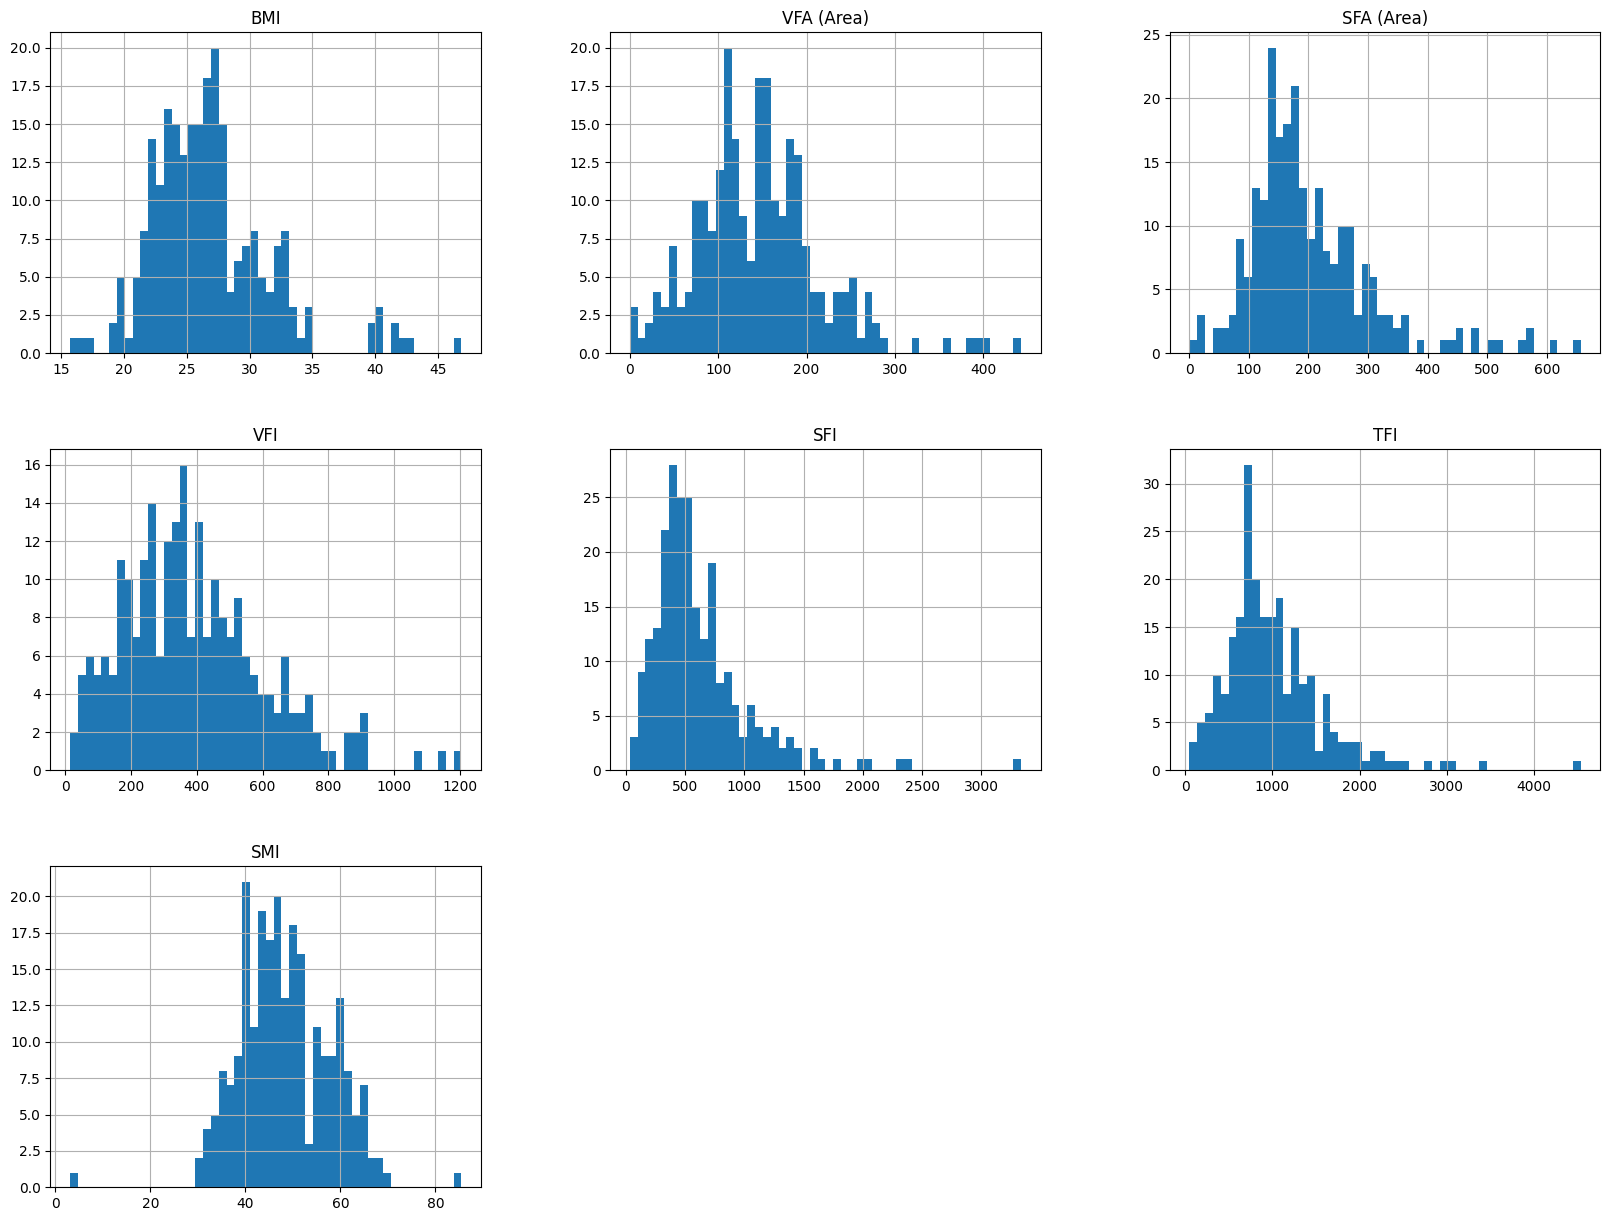

In [16]:
columns_of_interest = [
    "BMI",
    "VFA (Area)",
    "SFA (Area)",
    "VFI",
    "SFI",
    "TFI",
    "SMI",
    # "VFA (Attenuation)",
]
# 저거에 대해서 histogram을 그려보자
data[columns_of_interest].hist(bins=50, figsize=(20, 15))

# 이제 이 데이터를 이용해서 머신러닝을 해보자

In [22]:
data.columns

Index(['ID', 'Sex', 'Age', 'Birth Date', 'NASH', 'Fibrosis Stage',
       'NAFLD Type', 'Death', 'Death Date', 'Weight', 'Height',
       'Waist to Height', 'Waist', 'BMI_C', 'BMI', 'Last F/U', 'Smoking',
       'Ascites', 'Ascites_Date', 'VB', 'VB_Date', 'HEP', 'HEP_Date', 'HRS',
       'HRS_Date', 'LT', 'LT_Date', 'SBP', 'DBP', 'VFI', 'SFI', 'TFI', 'SMI',
       'VFA (Volume)', 'SFA (Volume)', 'Spleen (Volume)', 'VFA (Area)',
       'SFA (Area)', 'SMA (Area)', 'VFA (Attenuation)', 'SFA (Attenuation)',
       'SMA (Attenuation)', 'Liver/Spleen Volume', 'Liver/Spleen HU',
       'Liver (HU)', 'Spleen (HU)', 'Liver (PDFF)', 'CT_B date', 'FS_date',
       'LSM_C', 'LSM', 'CAP', 'AST', 'ALT', 'T.bil', 'PLT', 'PT INR', 'Alb',
       'Glucose', 'HbA1c', 'eGFR', 'T.chol', 'HDL', 'LDL', 'TG', 'FIB-4_C',
       'FIB-4', '당뇨병/당뇨병 전단계 유무', '고혈압유무', '이상지질혈증 유무',
       'Ischemic Heart Diseae 유무', 'Cerebrovascualr disease 유무',
       'Nephropathy 유무', 'LRE', 'LRE Date', 'Fibrosis'],
      dtype='o

Pearson Correlation Coefficient Matrix:
                 BMI       TFI       VFI  VFA (Area)       SFI  SFA (Area)  \
BMI         1.000000  0.660219  0.561616    0.583420  0.629503    0.747635   
TFI         0.660219  1.000000  0.837239    0.500729  0.960316    0.732894   
VFI         0.561616  0.837239  1.000000    0.789730  0.651494    0.428076   
VFA (Area)  0.583420  0.500729  0.789730    1.000000  0.291885    0.366346   
SFI         0.629503  0.960316  0.651494    0.291885  1.000000    0.798440   
SFA (Area)  0.747635  0.732894  0.428076    0.366346  0.798440    1.000000   
SMI         0.537557  0.219044  0.284658    0.468413  0.158700    0.283377   
SMA (Area)  0.499240  0.174965  0.219293    0.448249  0.130887    0.269908   

                 SMI  SMA (Area)  
BMI         0.537557    0.499240  
TFI         0.219044    0.174965  
VFI         0.284658    0.219293  
VFA (Area)  0.468413    0.448249  
SFI         0.158700    0.130887  
SFA (Area)  0.283377    0.269908  
SMI         

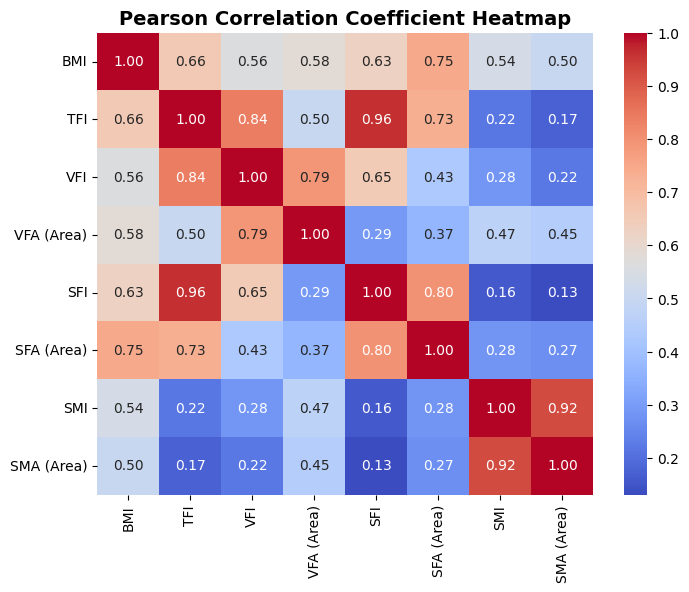

In [26]:
# Pearson 상관계수를 계산할 열 선택
columns_of_interest = [
    "BMI",
    "TFI",
    "VFI",
    "VFA (Area)",
    # "VFA (Attenuation)",
    "SFI",
    "SFA (Area)",
    # "SFA (Attenuation)",
    "SMI",
    "SMA (Area)",
    # "SMA (Attenuation)"
]
correlation_matrix = data[columns_of_interest].corr(method="pearson")

# 상관계수 결과 출력
print("Pearson Correlation Coefficient Matrix:")
print(correlation_matrix)

import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 6))

# Create heatmap with label formatting
ax = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Adjust label orientations
plt.xticks(rotation=90)  # X-axis labels (features) -> vertical
plt.yticks(rotation=0)  # Y-axis labels (features) -> horizontal

# Set title
plt.title("Pearson Correlation Coefficient Heatmap", fontsize=14, fontweight="bold")

# Save the figure
plt.savefig(
    "Pearson Correlation Coefficient Heatmap.jpg", bbox_inches="tight", dpi=1000
)

# Show plot
plt.show()

In [24]:
import seaborn as sns

print(sns.__version__)

0.12.1


Pearson Correlation Coefficient Matrix:
                 BMI       TFI       VFI VFA (Area)       SFI SFA (Area)  \
BMI              1.0  0.660219  0.561616    0.58342  0.629503   0.747635   
TFI         0.660219       1.0  0.837239   0.500729  0.960316   0.732894   
VFI         0.561616  0.837239       1.0    0.78973  0.651494   0.428076   
VFA (Area)   0.58342  0.500729   0.78973        1.0  0.291885   0.366346   
SFI         0.629503  0.960316  0.651494   0.291885       1.0    0.79844   
SFA (Area)  0.747635  0.732894  0.428076   0.366346   0.79844        1.0   
SMI         0.537557  0.219044  0.284658   0.468413    0.1587   0.283377   
SMA (Area)   0.49924  0.174965  0.219293   0.448249  0.130887   0.269908   

                 SMI SMA (Area)  
BMI         0.537557    0.49924  
TFI         0.219044   0.174965  
VFI         0.284658   0.219293  
VFA (Area)  0.468413   0.448249  
SFI           0.1587   0.130887  
SFA (Area)  0.283377   0.269908  
SMI              1.0   0.923775  
SMA

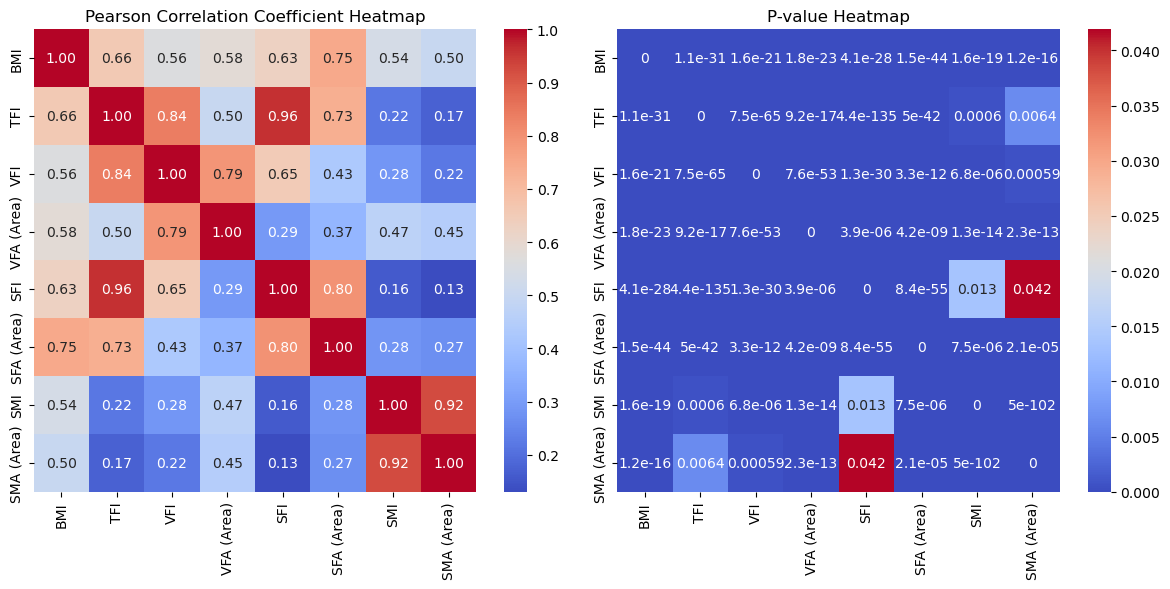

In [ ]:
from scipy.stats import pearsonr
import pandas as pd
import numpy as np

# 열 선택
columns_of_interest = [
    "BMI",
    "TFI",
    "VFI",
    "VFA (Area)",
    # "VFA (Attenuation)",
    "SFI",
    "SFA (Area)",
    # "SFA (Attenuation)",
    "SMI",
    "SMA (Area)",
    # "SMA (Attenuation)"
]

# 상관계수와 p-value 저장을 위한 빈 데이터프레임 생성
correlation_results = pd.DataFrame(
    index=columns_of_interest, columns=columns_of_interest
)

# p-value 저장용 데이터프레임
p_values = pd.DataFrame(index=columns_of_interest, columns=columns_of_interest)

# 상관계수와 p-value 계산
for col1 in columns_of_interest:
    for col2 in columns_of_interest:
        if col1 == col2:
            # 자기 자신과의 상관계수는 1, p-value는 0으로 설정
            correlation_results.loc[col1, col2] = 1.0
            p_values.loc[col1, col2] = 0.0
        else:
            r, p = pearsonr(data[col1], data[col2])
            correlation_results.loc[col1, col2] = r
            p_values.loc[col1, col2] = p

# 결과 출력
print("Pearson Correlation Coefficient Matrix:")
print(correlation_results)

print("\nP-value Matrix:")
print(p_values)

# 히트맵 시각화 (상관계수와 p-value)
plt.figure(figsize=(12, 6))

# 상관계수 히트맵
plt.subplot(1, 2, 1)
sns.heatmap(correlation_results.astype(float), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Coefficient Heatmap")

# P-value 히트맵
plt.subplot(1, 2, 2)
sns.heatmap(p_values.astype(float), annot=True, cmap="coolwarm", fmt=".2g", cbar=True)
plt.title("P-value Heatmap")

plt.tight_layout()
plt.show()

In [92]:
# NAFLD Type 열에 요소가 몇가지 있고 각각에 대해 count가 어떻게 되는지 NaN 고려해서
data["NAFLD Type"].value_counts(dropna=False)
# data["NAFLD Type"].value_counts()

NAFLD Type
NASH             61
NAFL             57
Probable NASH    46
Cirrhosis        27
Others           27
None             24
Name: count, dtype: int64

In [31]:
import pandas as pd

pd.set_option("display.max_columns", None)  # 모든 열 표시
pd.set_option("display.expand_frame_repr", False)  # 가로로 긴 데이터프레임 줄바꿈 방지

In [77]:
data["Fibrosis Stage"].value_counts(dropna=False)

Fibrosis Stage
Low     158
High     84
Name: count, dtype: int64

In [31]:
data.columns

Index(['ID', 'Sex', 'Age', 'Birth Date', 'NASH', 'Fibrosis Stage',
       'NAFLD Type', 'Death', 'Death Date', 'Weight', 'Height',
       'Waist to Height', 'Waist', 'BMI_C', 'BMI', 'Last F/U', 'Smoking',
       'Ascites', 'Ascites_Date', 'VB', 'VB_Date', 'HEP', 'HEP_Date', 'HRS',
       'HRS_Date', 'LT', 'LT_Date', 'SBP', 'DBP', 'VFI', 'SFI', 'TFI', 'SMI',
       'VFA (Volume)', 'SFA (Volume)', 'Spleen (Volume)', 'VFA (Area)',
       'SFA (Area)', 'SMA (Area)', 'VFA (Attenuation)', 'SFA (Attenuation)',
       'SMA (Attenuation)', 'Liver/Spleen Volume', 'Liver/Spleen HU',
       'Liver (HU)', 'Spleen (HU)', 'Liver (PDFF)', 'CT_B date', 'FS_date',
       'LSM_C', 'LSM', 'CAP', 'AST', 'ALT', 'T.bil', 'PLT', 'PT INR', 'Alb',
       'Glucose', 'HbA1c', 'eGFR', 'T.chol', 'HDL', 'LDL', 'TG', 'FIB-4_C',
       'FIB-4', '당뇨병/당뇨병 전단계 유무', '고혈압유무', '이상지질혈증 유무',
       'Ischemic Heart Diseae 유무', 'Cerebrovascualr disease 유무',
       'Nephropathy 유무', 'LRE', 'LRE Date', 'Fibrosis'],
      dtype='o

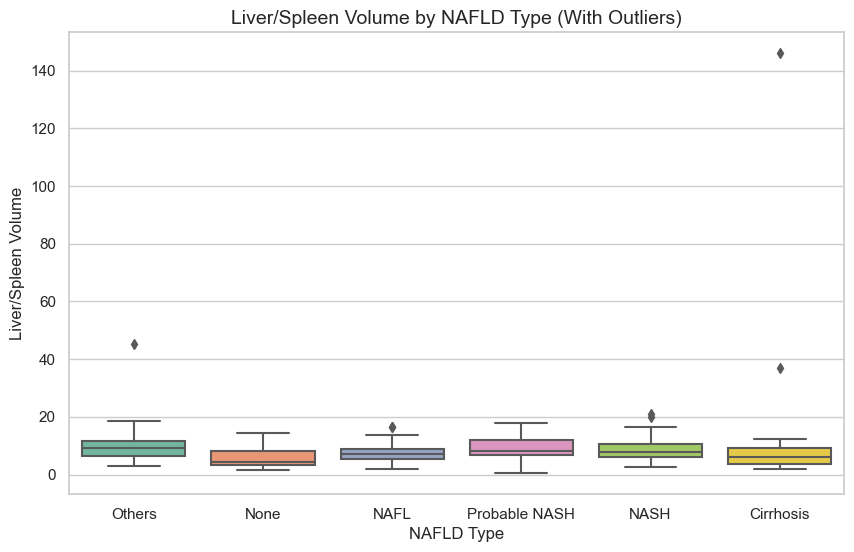

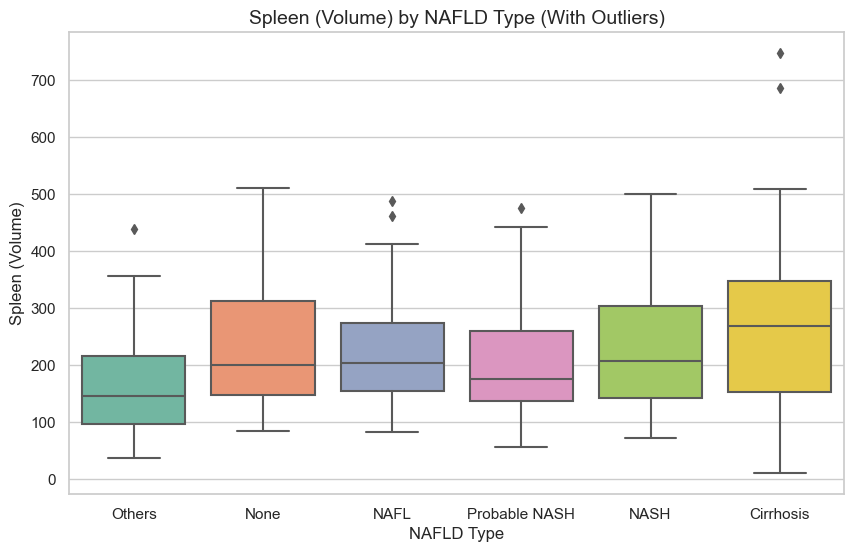

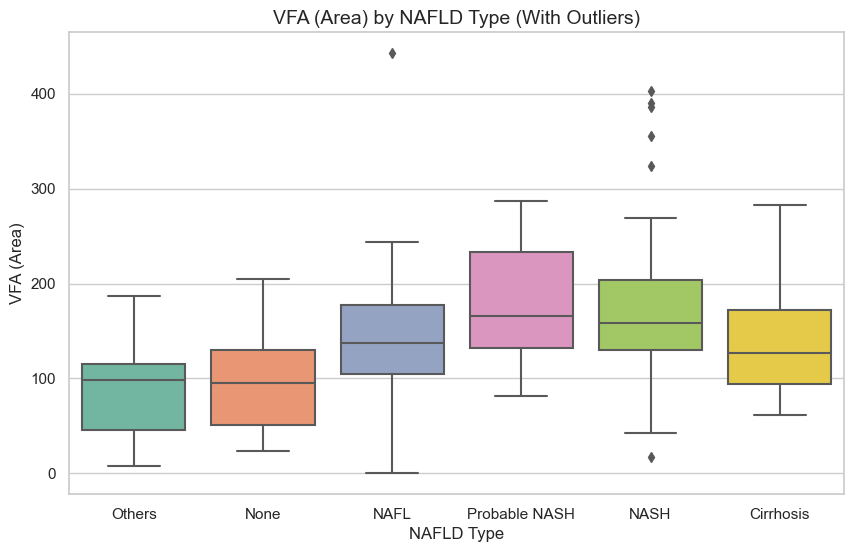

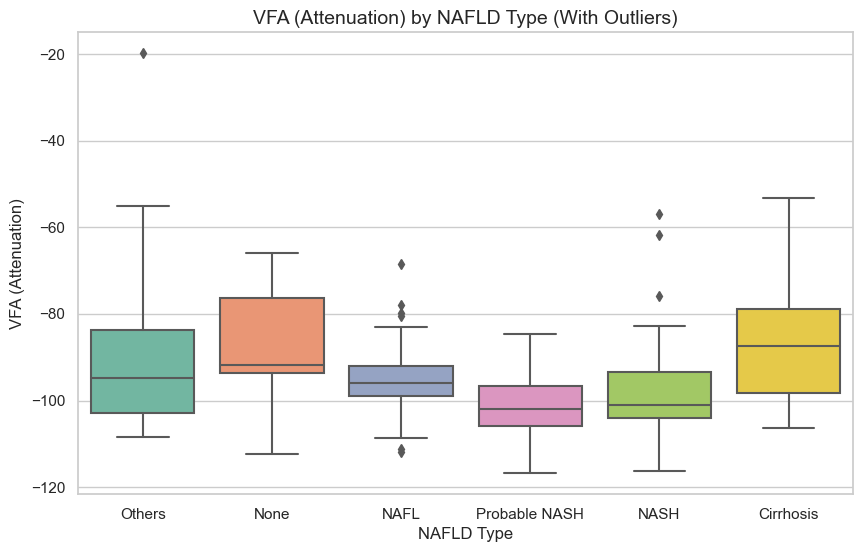

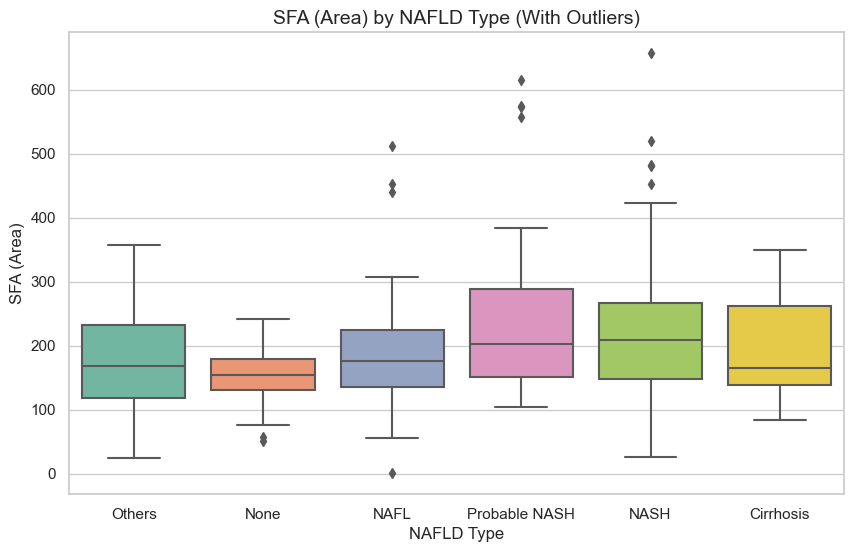

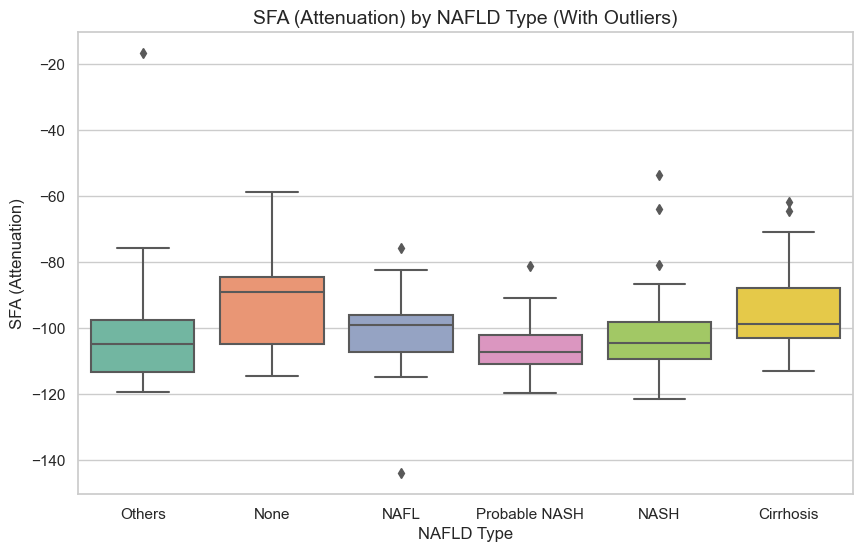

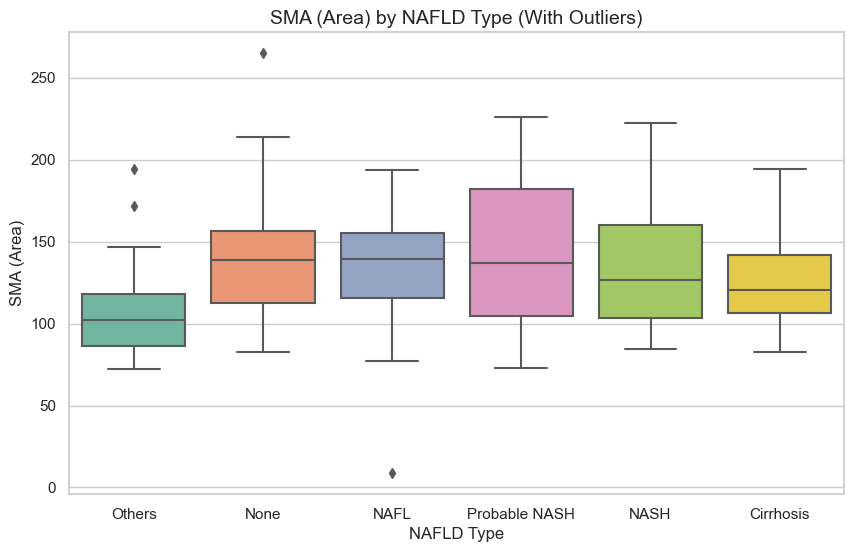

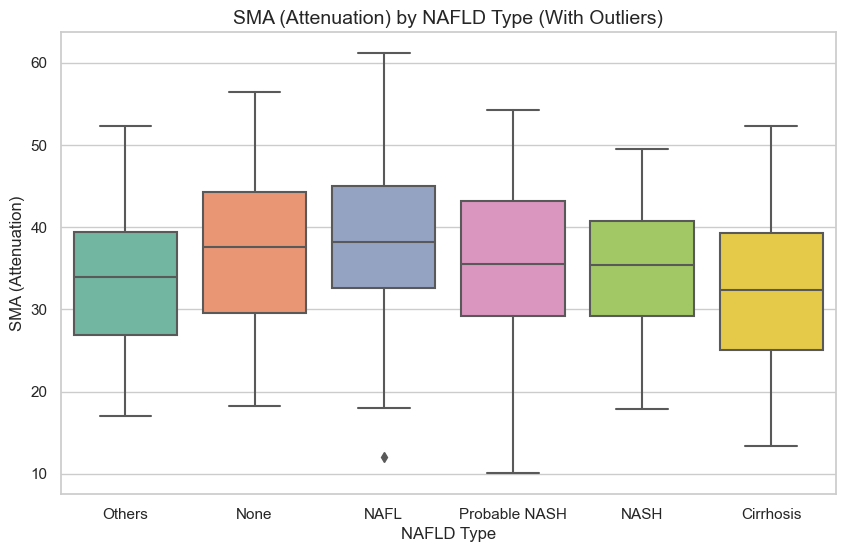

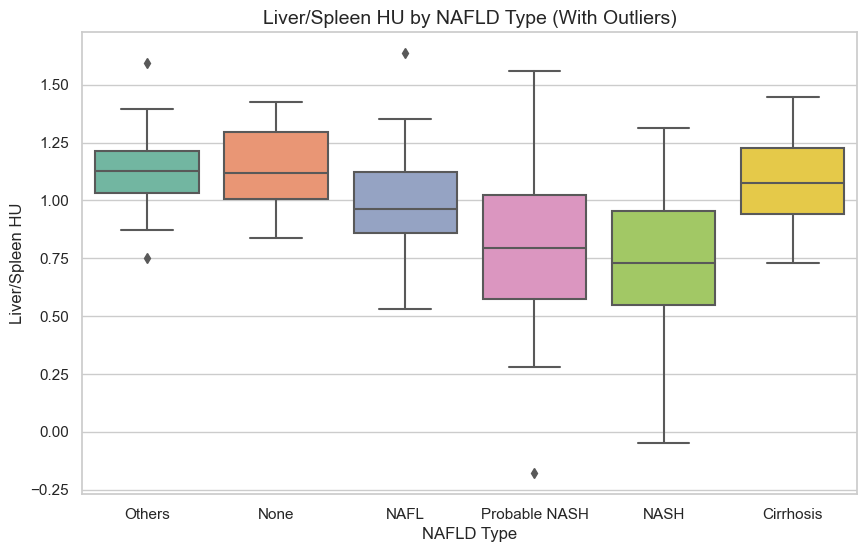

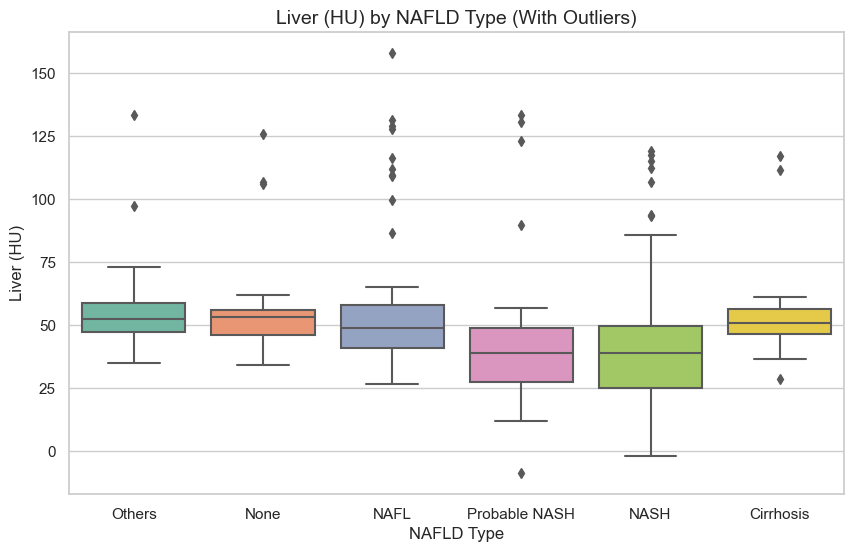

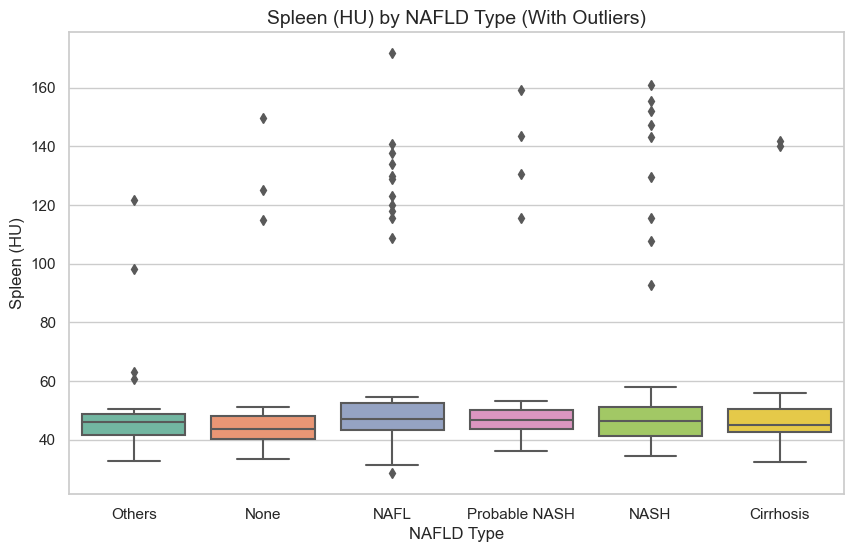

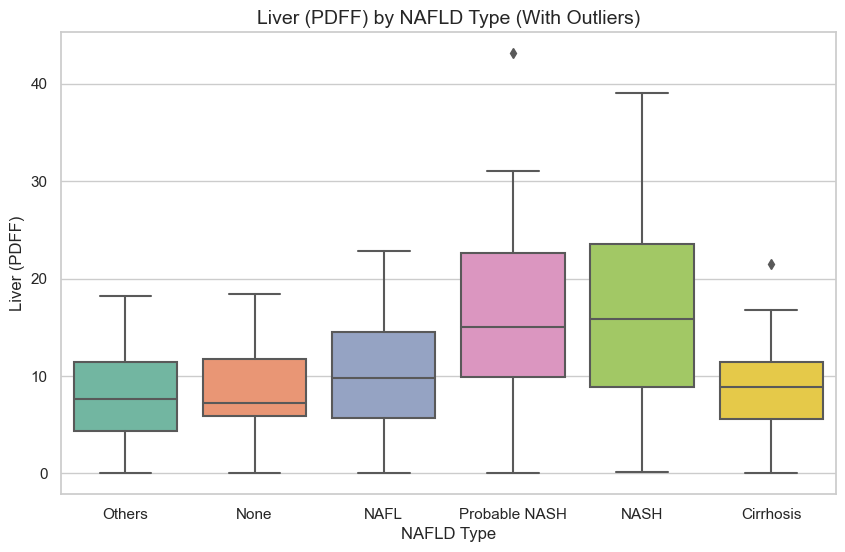

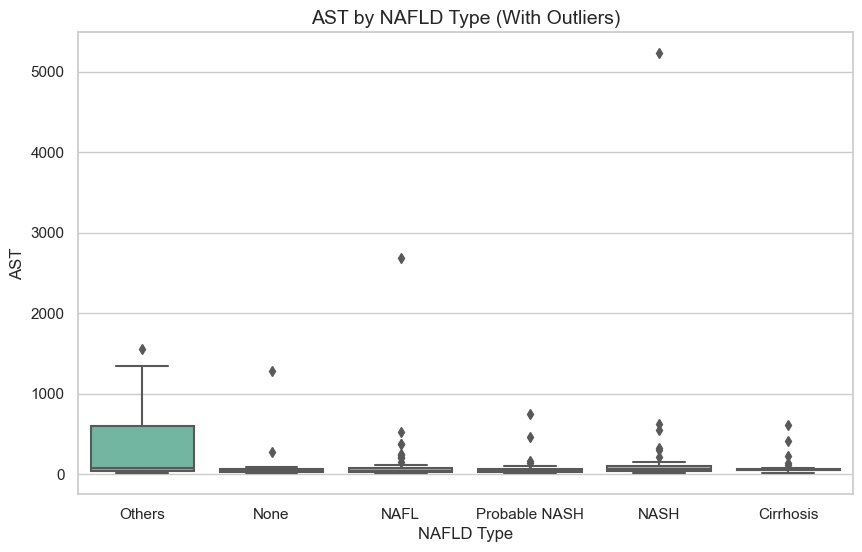

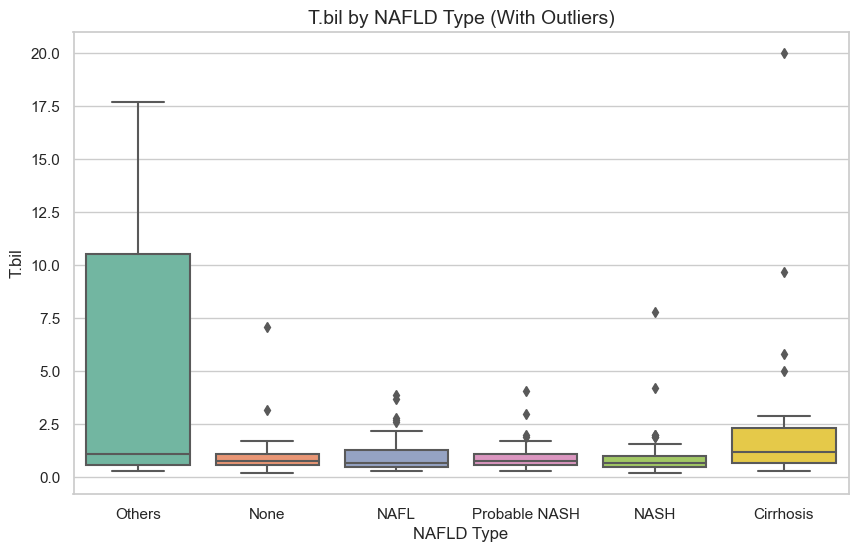

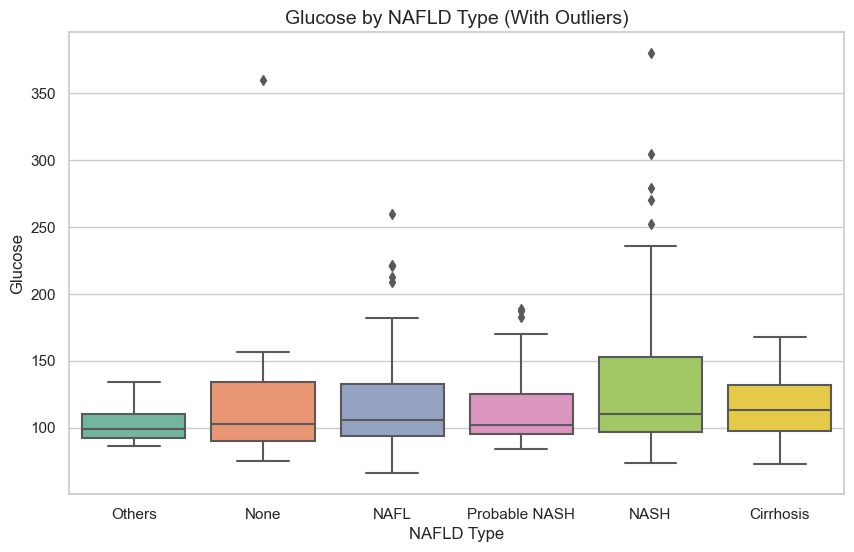

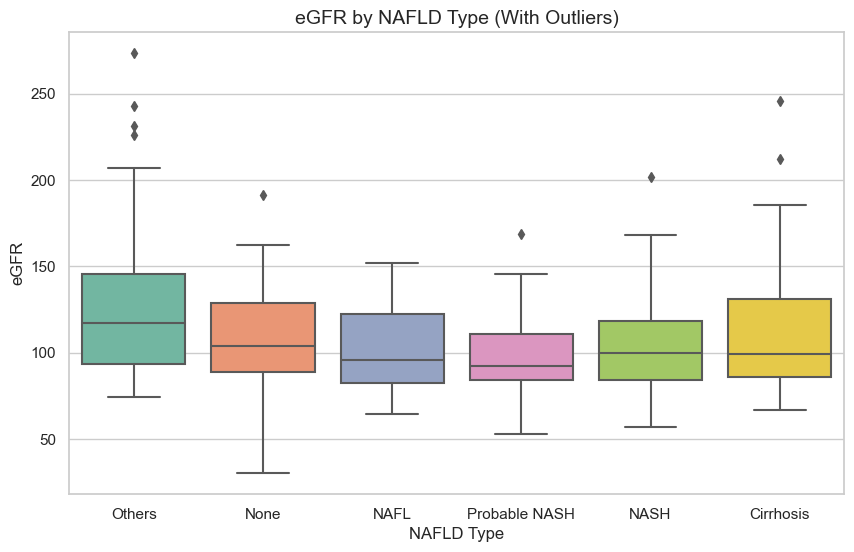

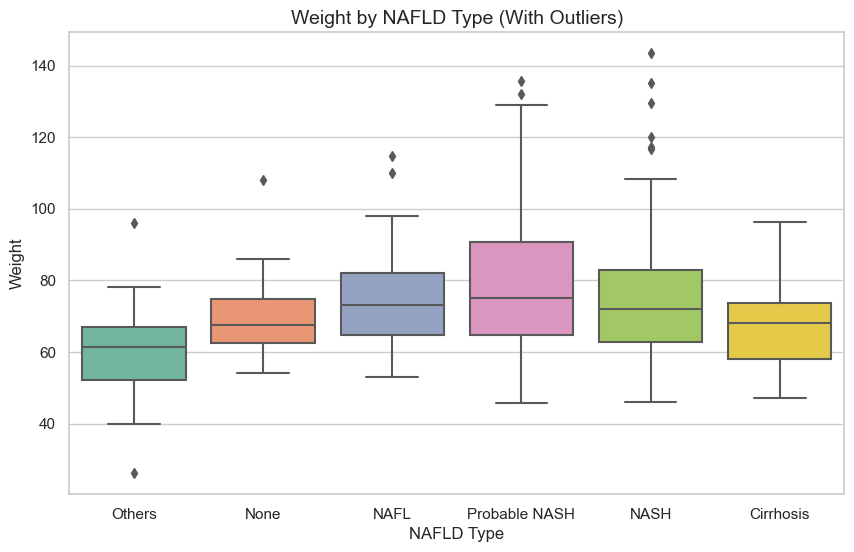

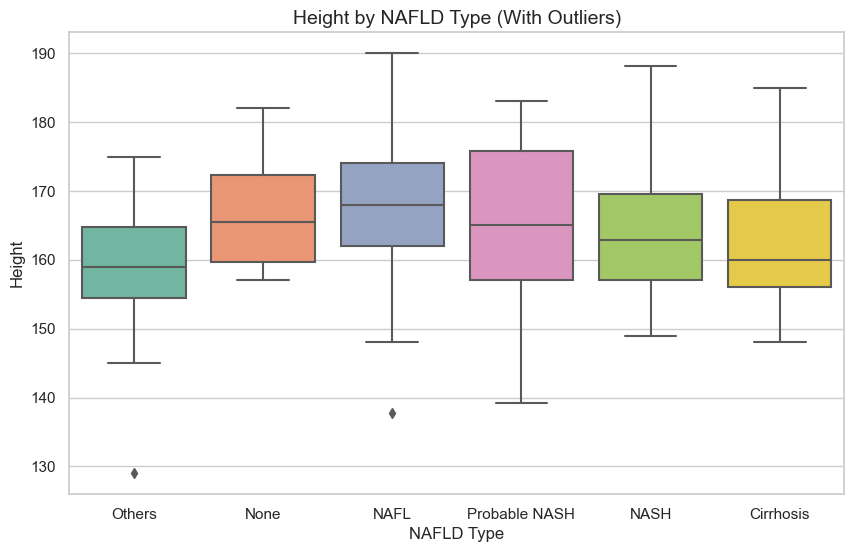

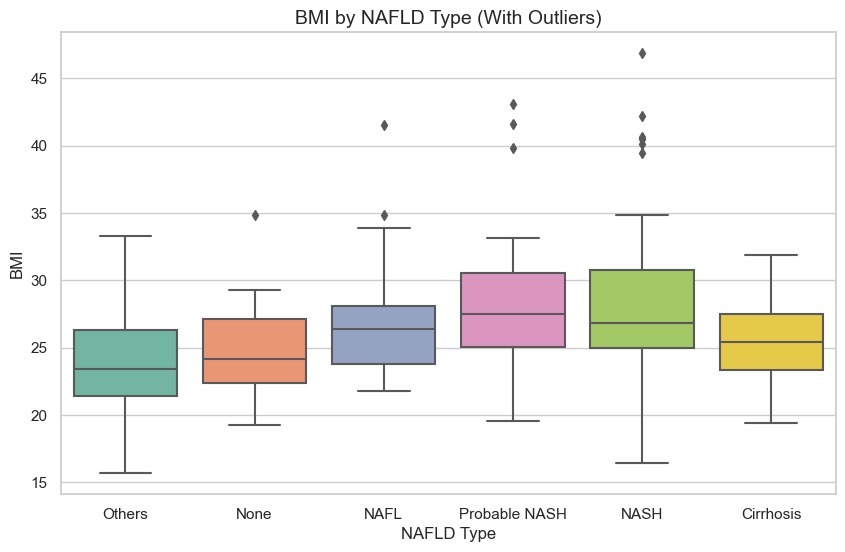

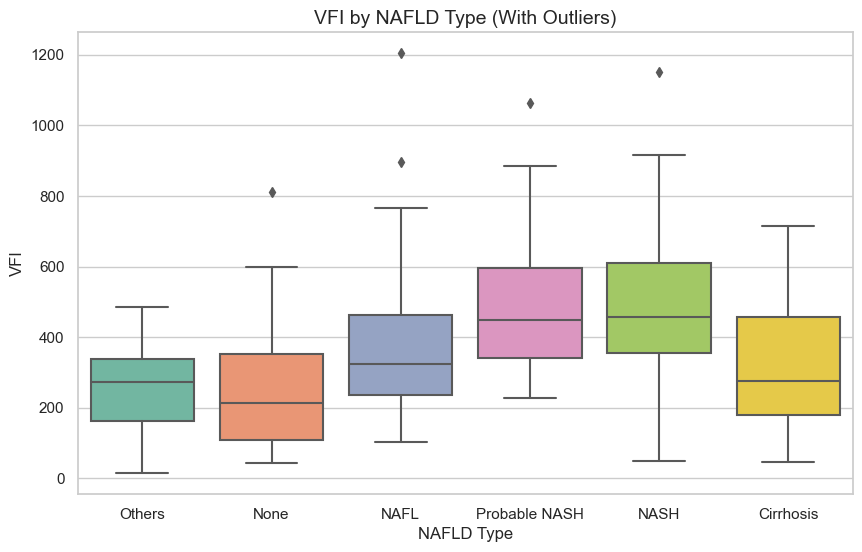

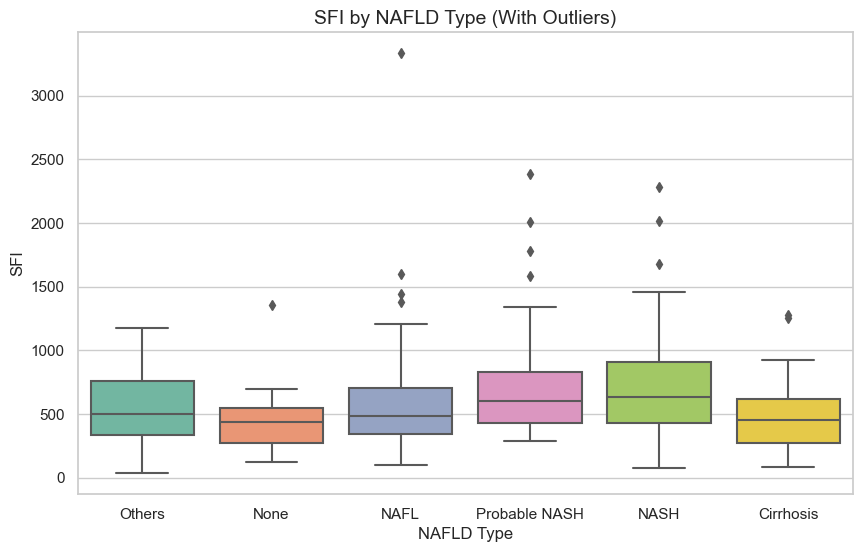

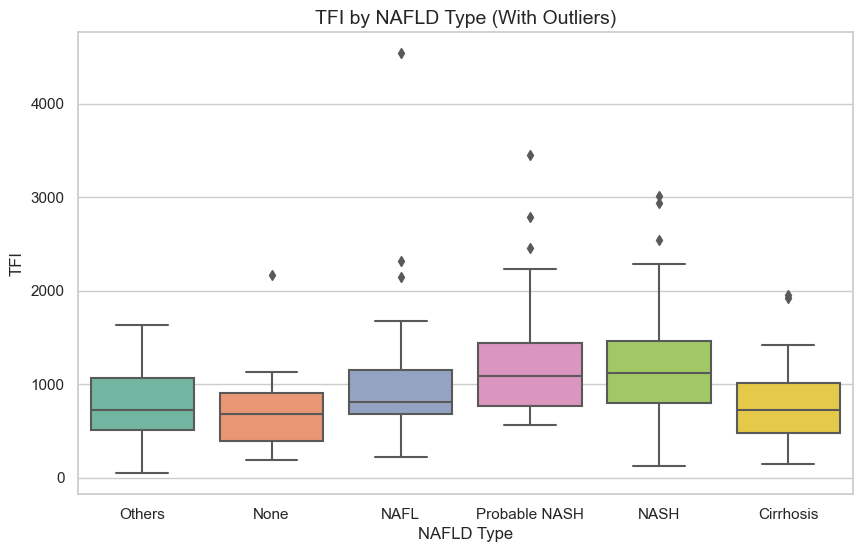

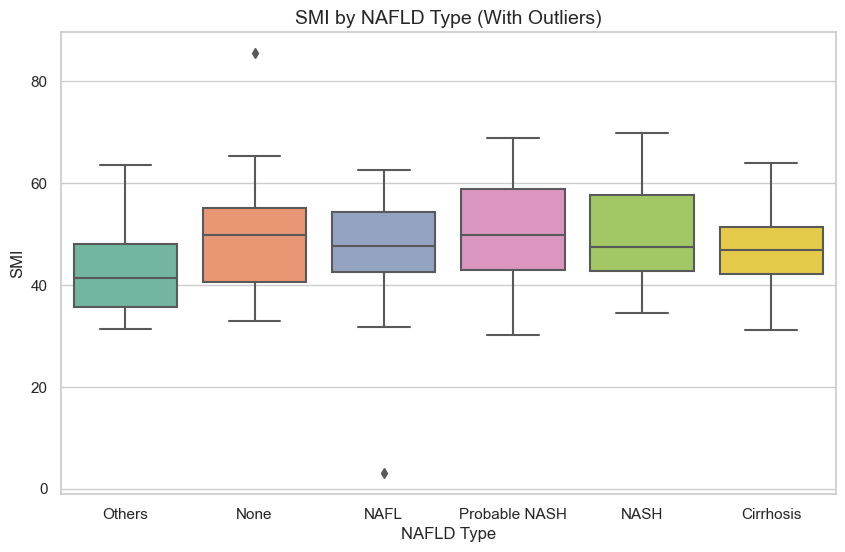

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = data.copy()

# Convert NAFLD Type to categorical with the specified order
nafld_order = ["Others", "None", "NAFL", "Probable NASH", "NASH", "Cirrhosis"]

df["NAFLD Type"] = pd.Categorical(
    df["NAFLD Type"], categories=nafld_order, ordered=True
)

# Set the style of the plot
sns.set(style="whitegrid")

# Create the folder "Without Outliers" if it doesn't exist
output_folder = "With Outliers"
os.makedirs(output_folder, exist_ok=True)

# List of features to plot on the y-axis
features_to_plot = [
    "Liver/Spleen Volume",
    "Spleen (Volume)",
    "VFA (Area)",
    "VFA (Attenuation)",
    "SFA (Area)",
    "SFA (Attenuation)",
    "SMA (Area)",
    "SMA (Attenuation)",
    "Liver/Spleen HU",
    "Liver (HU)",
    "Spleen (HU)",
    "Liver (PDFF)",
    "AST",
    "T.bil",
    "Glucose",
    "eGFR",
    "Weight",
    "Height",
    "BMI",
    "VFI",
    "SFI",
    "TFI",
    "SMI",
]

# Loop through each feature and create a boxplot without outliers
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))

    # Create the boxplot without outliers
    sns.boxplot(x="NAFLD Type", y=feature, data=df, palette="Set2", showfliers=True)

    # Add titles and labels
    plt.title(f"{feature} by NAFLD Type (With Outliers)", fontsize=14)
    plt.xlabel("NAFLD Type", fontsize=12)
    plt.ylabel(feature, fontsize=12)

    # Save the plot in the "Without Outliers" folder
    filename = feature.replace("/", "_").replace(" ", "_") + "_with_outliers.png"
    file_path = os.path.join(output_folder, filename)
    plt.savefig(file_path, dpi=300, bbox_inches="tight")

    # Show the plot (optional: comment out if you don't need to display)
    plt.show()

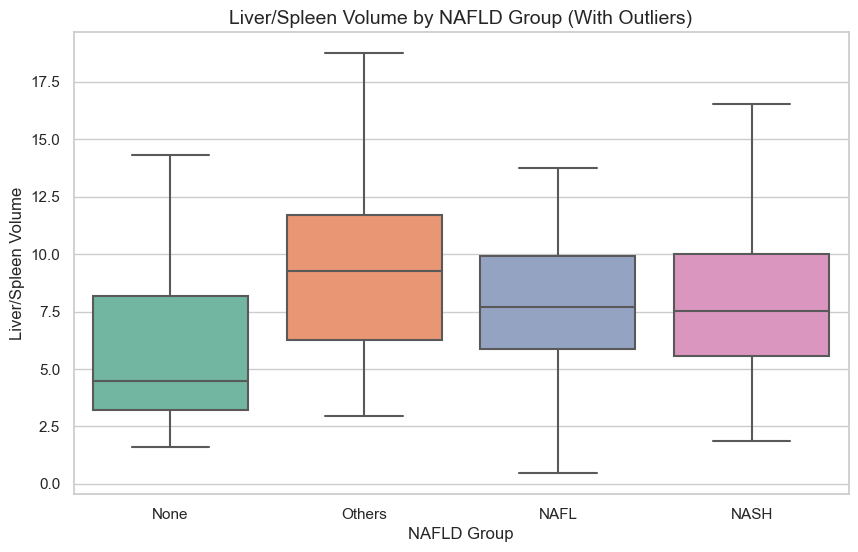

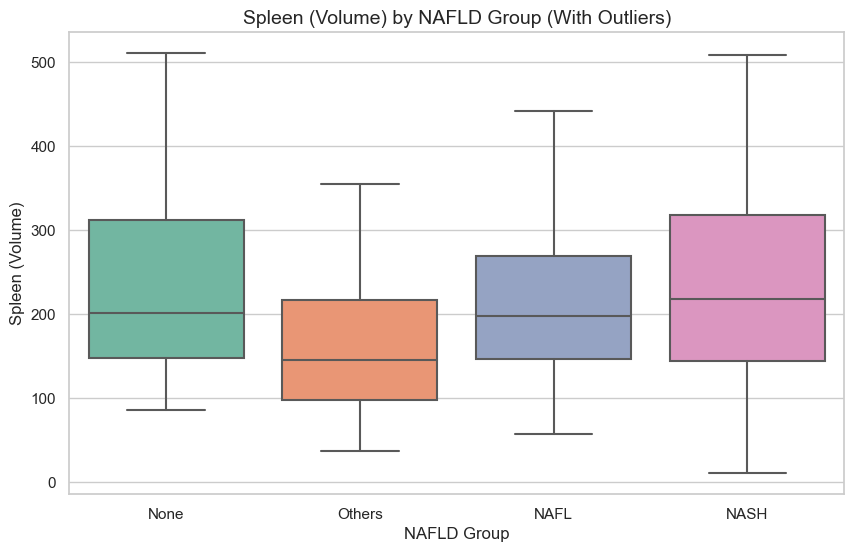

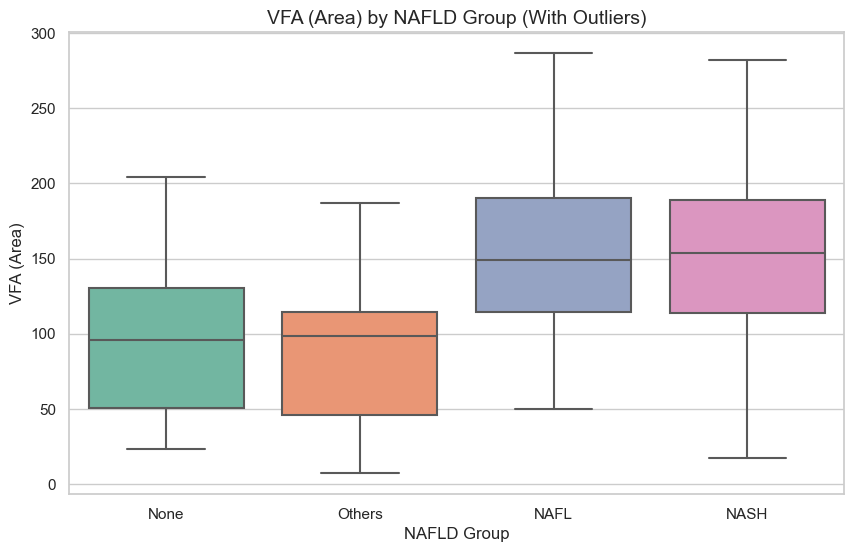

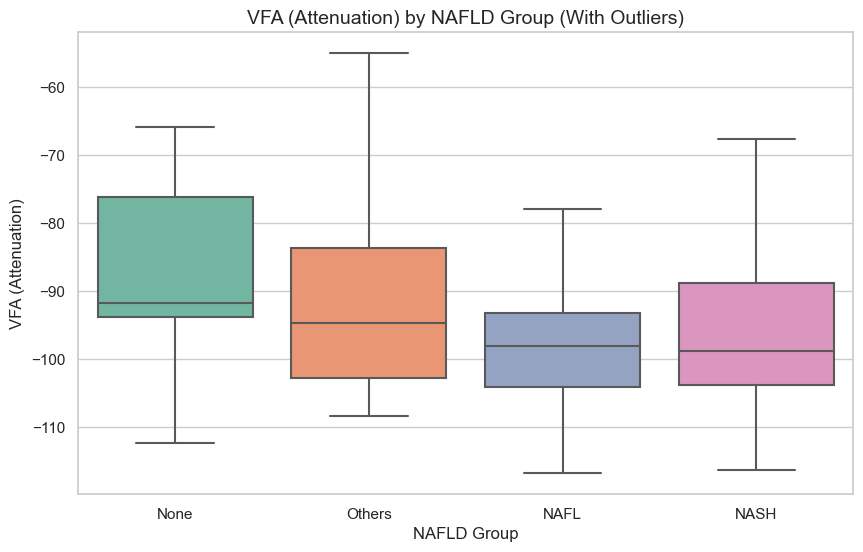

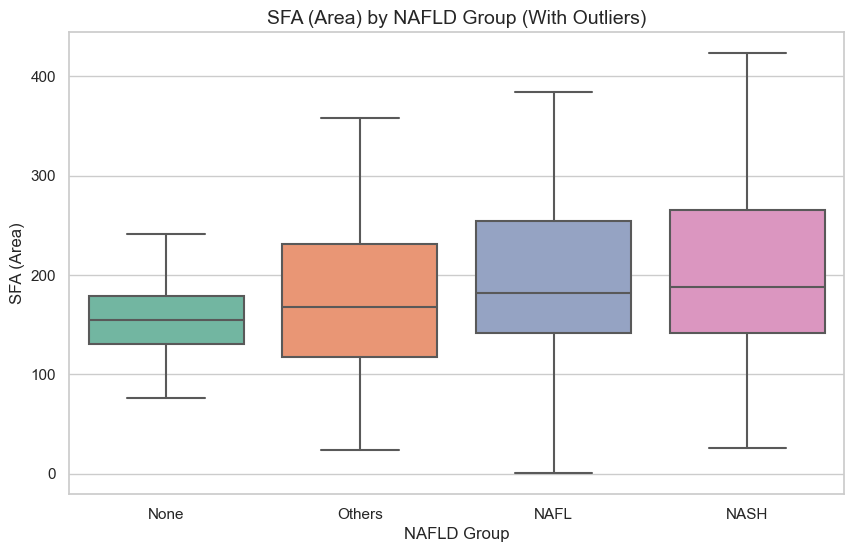

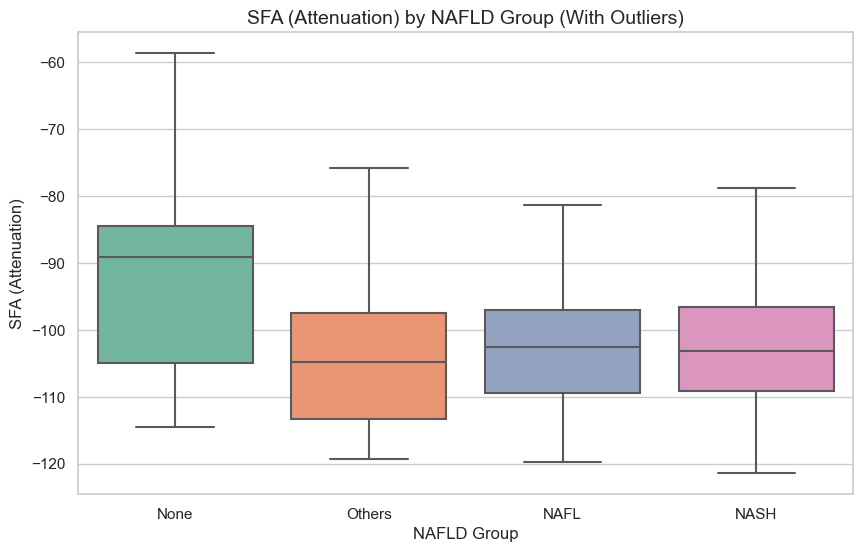

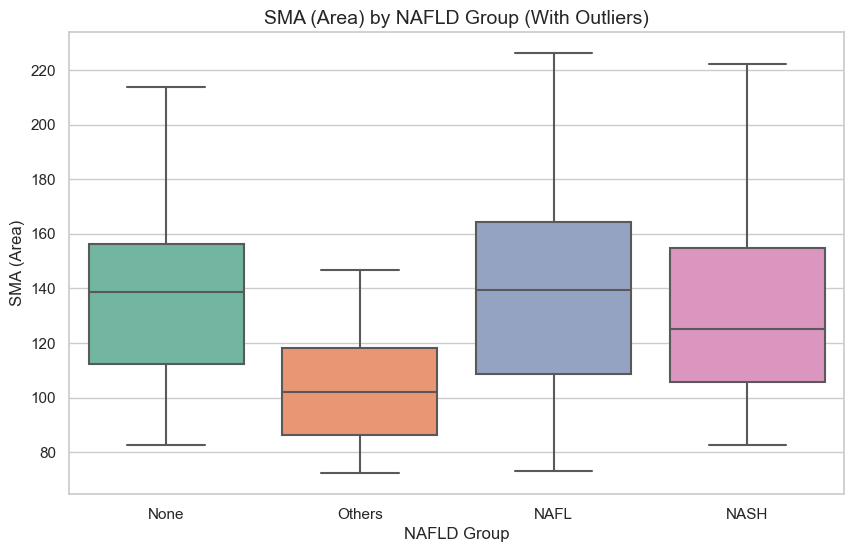

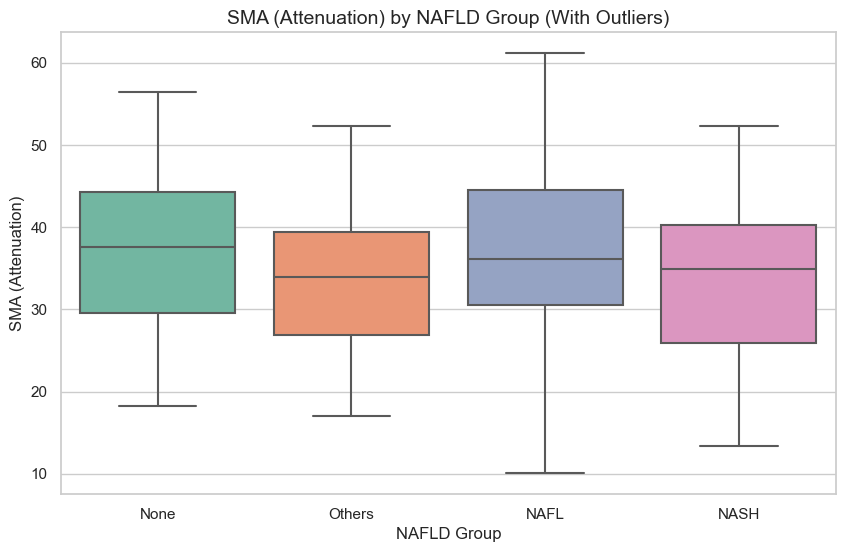

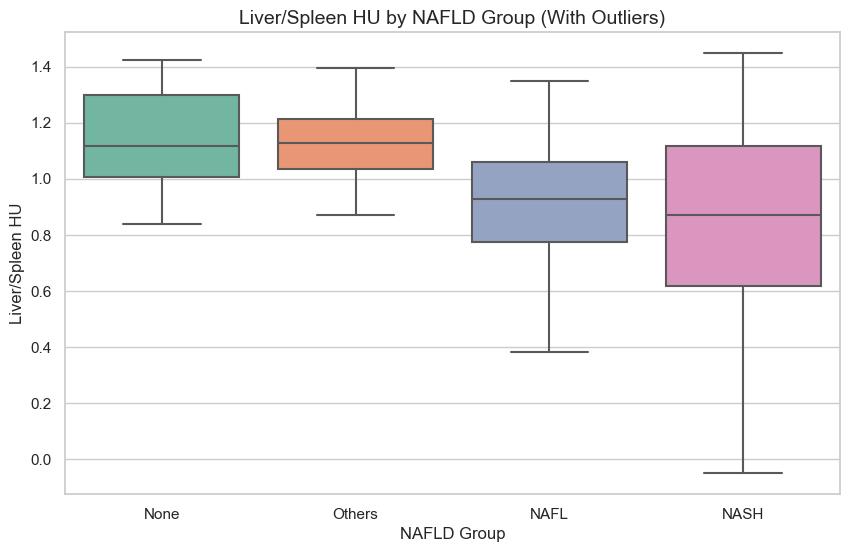

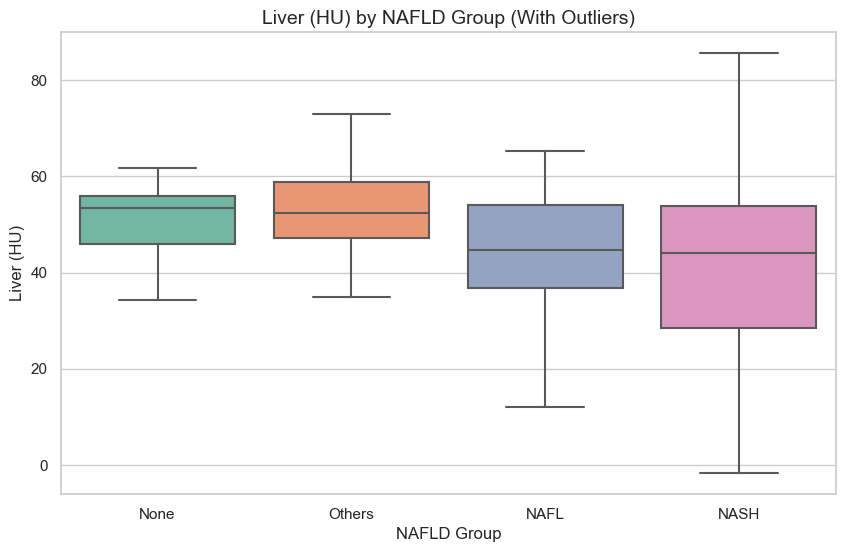

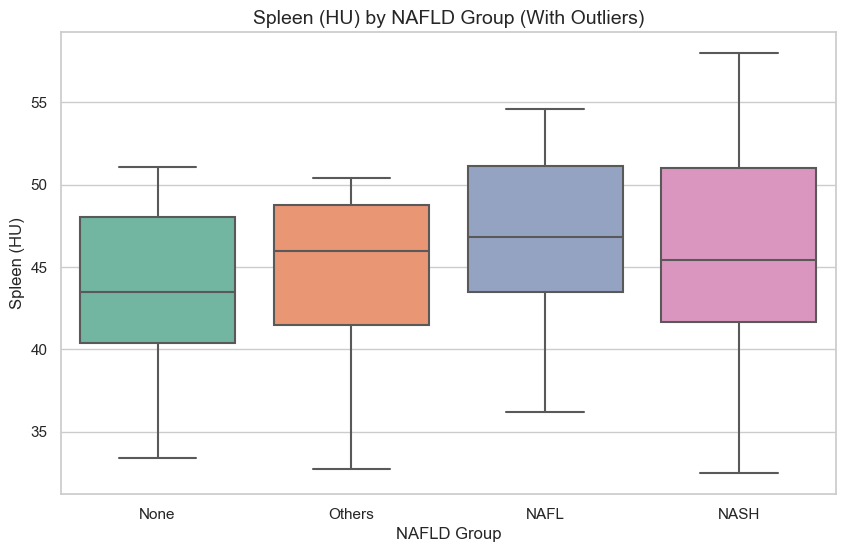

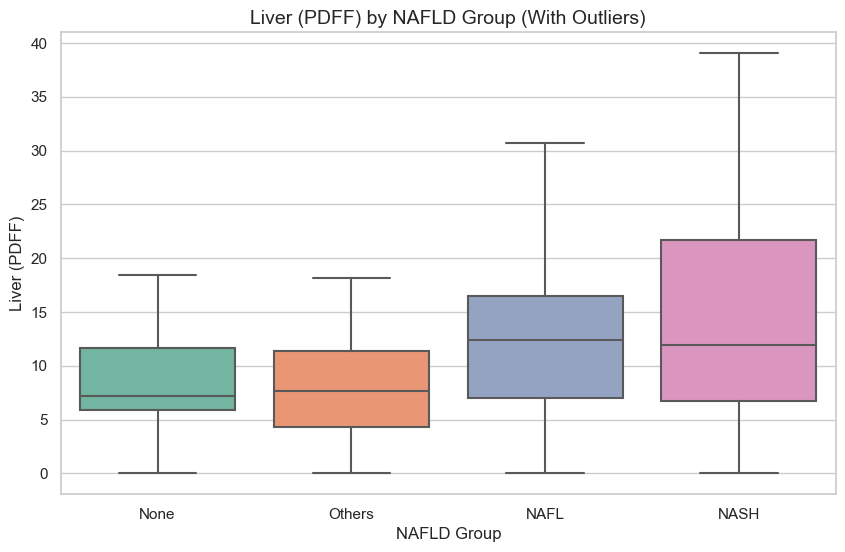

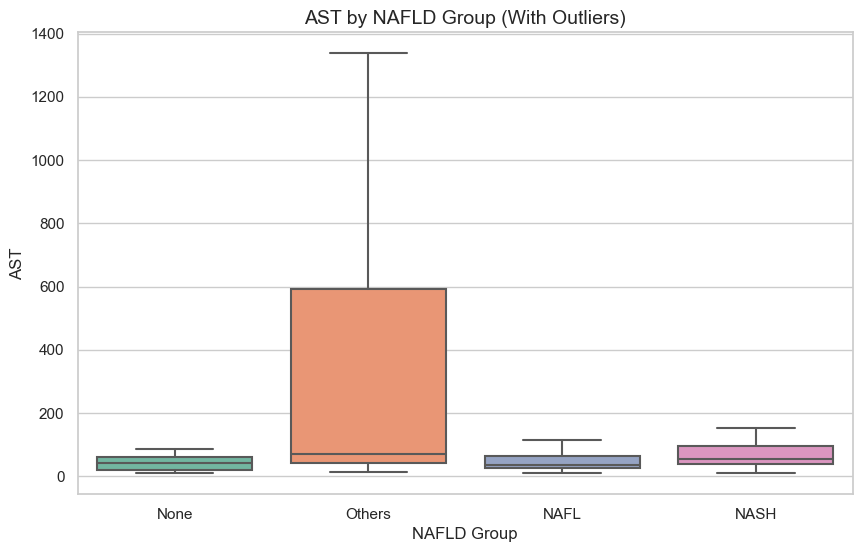

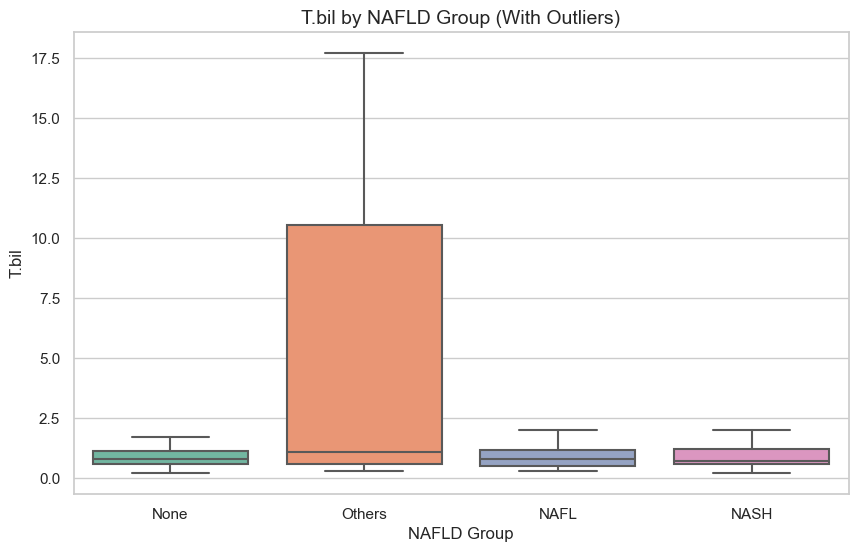

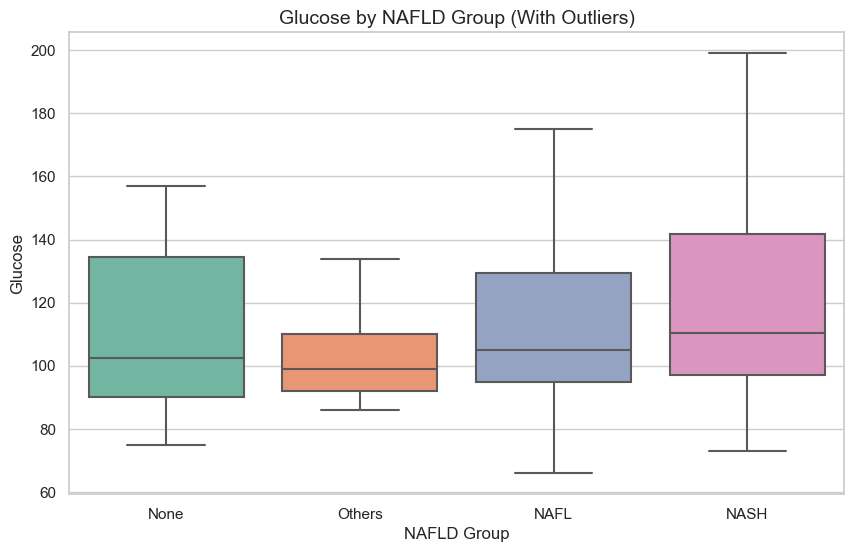

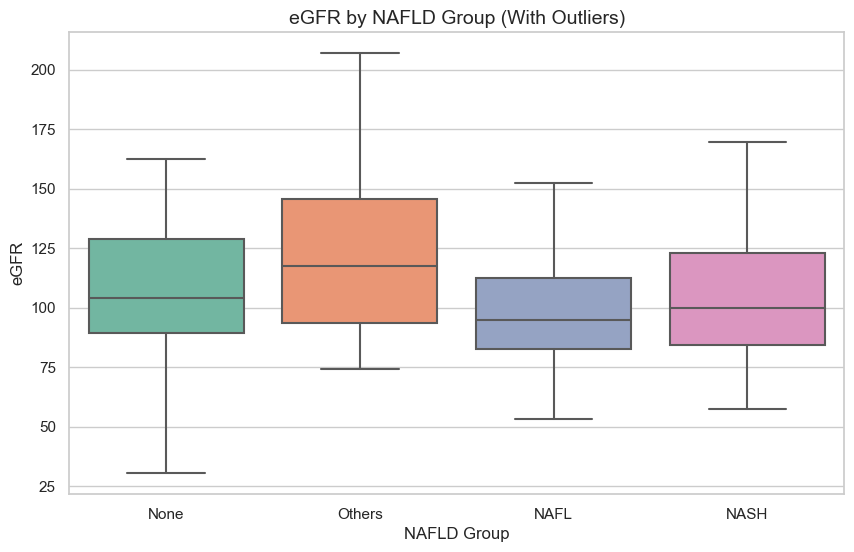

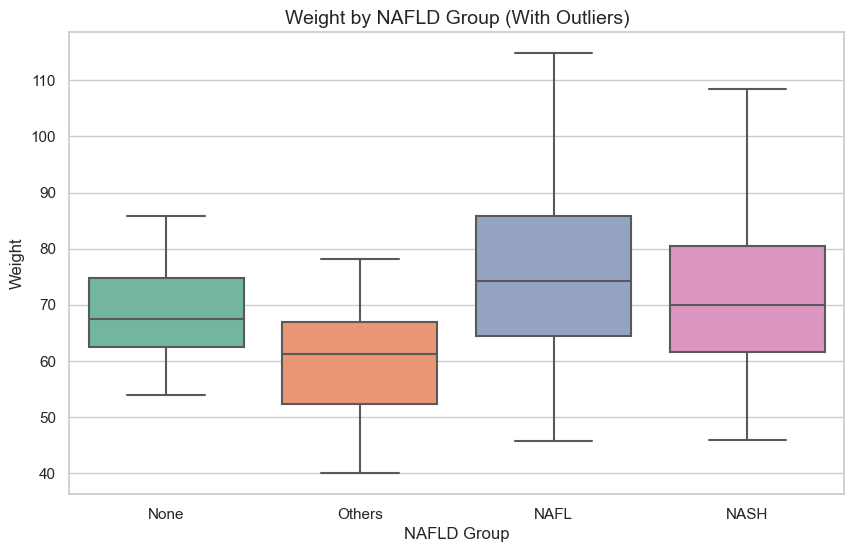

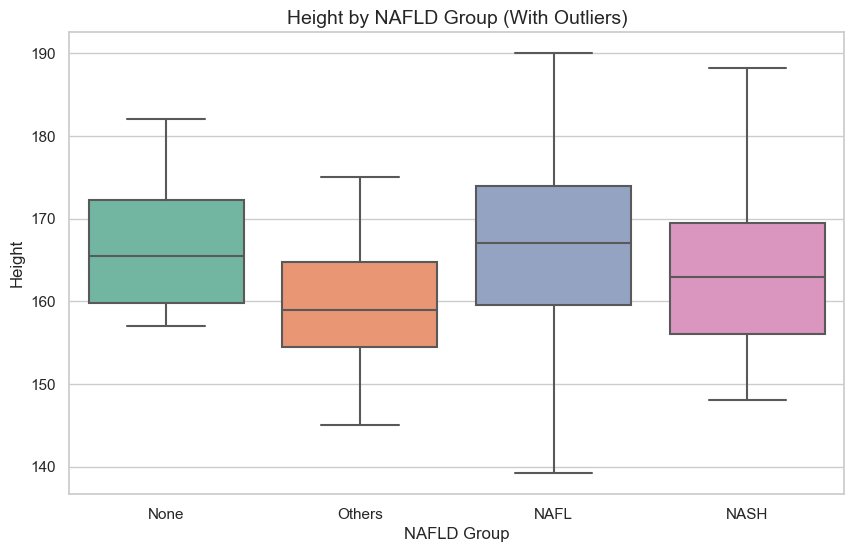

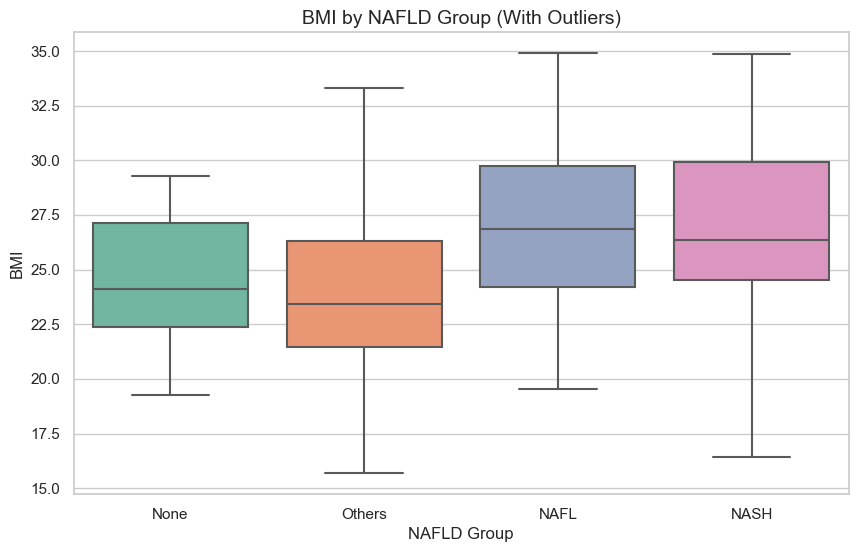

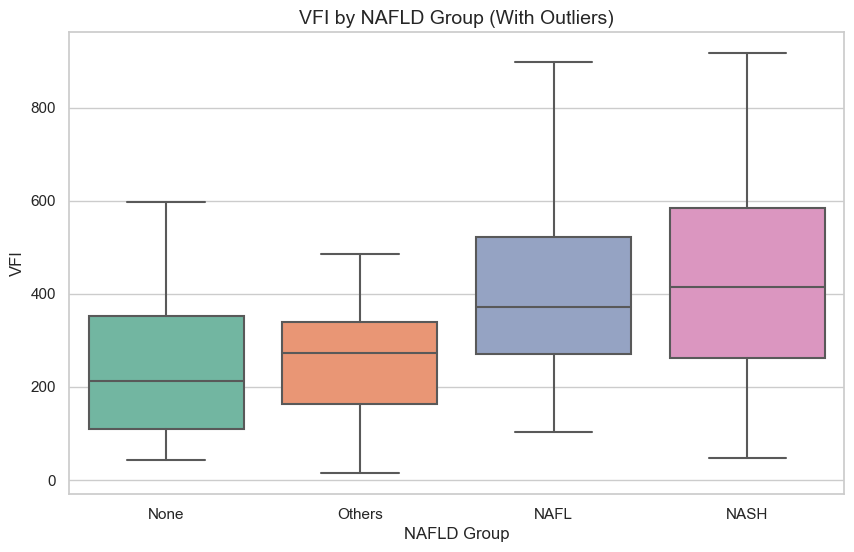

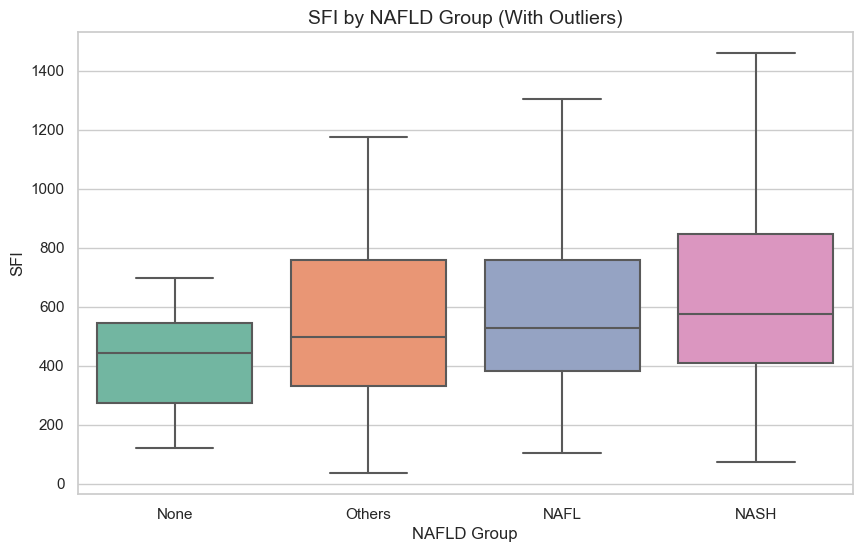

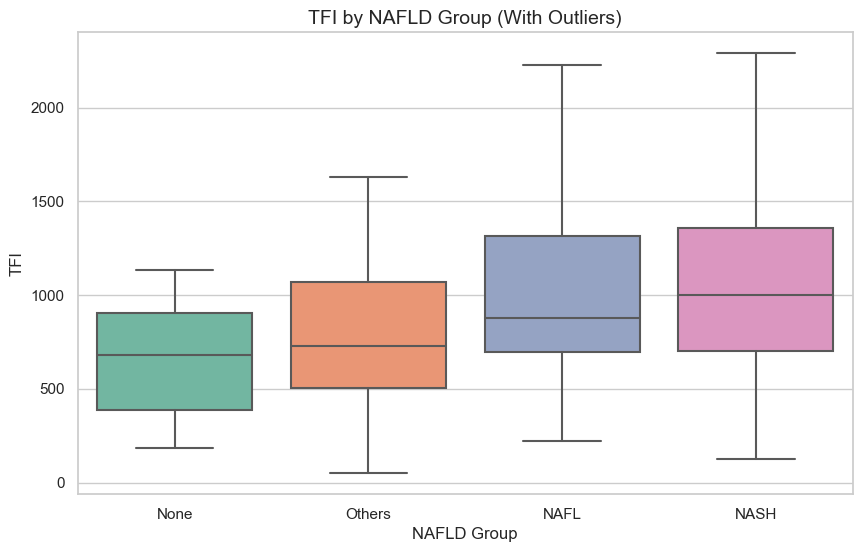

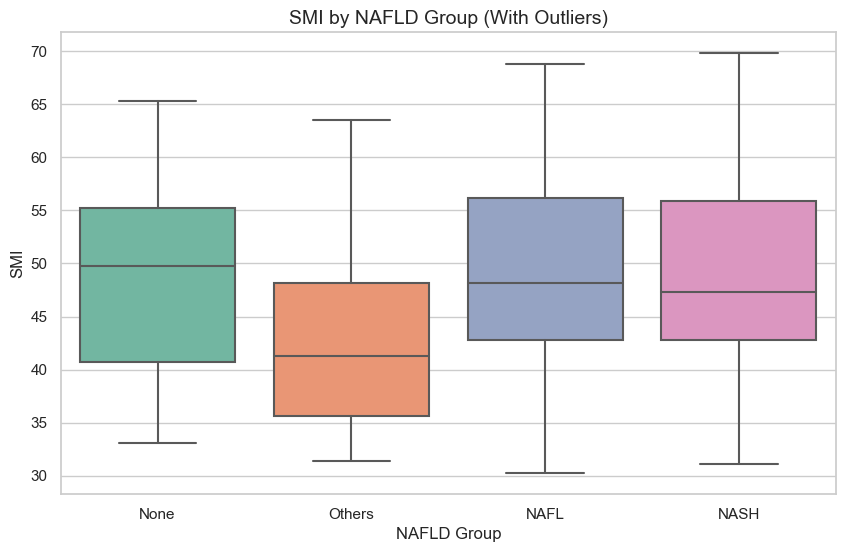

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

df = data.copy()

# Define the new NAFLD groups
nafld_group_mapping = {
    "Others": "Others",
    "None": "None",
    "NAFL": "NAFL",
    "Probable NASH": "NAFL",
    "NASH": "NASH",
    "Cirrhosis": "NASH",
}

# Apply the grouping
df["NAFLD Group"] = df["NAFLD Type"].map(nafld_group_mapping)

# Set categorical order
nafld_order = ["None", "Others", "NAFL", "NASH"]
df["NAFLD Group"] = pd.Categorical(
    df["NAFLD Group"], categories=nafld_order, ordered=True
)

# Set the style of the plot
sns.set(style="whitegrid")

# Create the folder "With Outliers" if it doesn't exist
output_folder = "With Outliers"
os.makedirs(output_folder, exist_ok=True)

# List of features to plot on the y-axis
features_to_plot = [
    "Liver/Spleen Volume",
    "Spleen (Volume)",
    "VFA (Area)",
    "VFA (Attenuation)",
    "SFA (Area)",
    "SFA (Attenuation)",
    "SMA (Area)",
    "SMA (Attenuation)",
    "Liver/Spleen HU",
    "Liver (HU)",
    "Spleen (HU)",
    "Liver (PDFF)",
    "AST",
    "T.bil",
    "Glucose",
    "eGFR",
    "Weight",
    "Height",
    "BMI",
    "VFI",
    "SFI",
    "TFI",
    "SMI",
]

# Loop through each feature and create a boxplot
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))

    # Create the boxplot using the new NAFLD groups
    sns.boxplot(x="NAFLD Group", y=feature, data=df, palette="Set2", showfliers=False)

    # Add titles and labels
    plt.title(f"{feature} by NAFLD Group (With Outliers)", fontsize=14)
    plt.xlabel("NAFLD Group", fontsize=12)
    plt.ylabel(feature, fontsize=12)

    # Save the plot
    filename = feature.replace("/", "_").replace(" ", "_") + "_with_outliers.png"
    file_path = os.path.join(output_folder, filename)
    plt.savefig(file_path, dpi=300, bbox_inches="tight")

    # Show the plot (optional: comment out if not needed)
    plt.show()

In [ ]:
# data["NASH_label"] = data["NAFLD Type"].apply(
#    lambda x: 1 if x in ["Probable NASH", "NASH", "Cirrhosis" ] else 0
# )

In [ ]:
# data["NASH_label2"] = data["NAFLD Type"].apply(
#    lambda x: 1 if x in ["NASH", "Cirrhosis" ] else 0
# )

In [ ]:
# NASH_label이 1인 행만 추출
# data_with_NASH = data[data["NASH_label"] == 1]

# Fibrosis에 대해 (1) Fibrosis 정의 (2) 환자군 조합 테스트하여 Best AUC 찾아보기

In [33]:
# Set pandas display options to show full rows and columns
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.expand_frame_repr", False)  # Prevent column wrapping

In [17]:
print(data.columns.tolist())

['ID', 'Sex', 'Age', 'Birth Date', 'NASH', 'Fibrosis Stage', 'Steatosis Score', 'NAFLD Type', 'Death', 'Death Date', 'Weight', 'Height', 'Waist to Height', 'Waist', 'BMI_C', 'BMI', 'Last F/U', 'Smoking', 'Ascites', 'Ascites_Date', 'VB', 'VB_Date', 'HEP', 'HEP_Date', 'HRS', 'HRS_Date', 'LT', 'LT_Date', 'SBP', 'DBP', 'VFI', 'SFI', 'TFI', 'SMI', 'VFA (Volume)', 'SFA (Volume)', 'Spleen (Volume)', 'VFA (Area)', 'SFA (Area)', 'SMA (Area)', 'VFA (Attenuation)', 'SFA (Attenuation)', 'SMA (Attenuation)', 'Liver/Spleen Volume', 'Liver/Spleen HU', 'Liver (HU)', 'Spleen (HU)', 'Liver (PDFF)', 'CT_B date', 'FS_date', 'LSM_C', 'LSM', 'CAP', 'AST', 'ALT', 'T.bil', 'PLT', 'PT INR', 'Alb', 'Glucose', 'HbA1c', 'eGFR', 'T.chol', 'HDL', 'LDL', 'TG', 'FIB-4_C', 'FIB-4', '당뇨병/당뇨병 전단계 유무', '고혈압유무', '이상지질혈증 유무', 'Ischemic Heart Diseae 유무', 'Cerebrovascualr disease 유무', 'Nephropathy 유무', 'LRE', 'LRE Date', 'Fibrosis', 'BSA', 'Spleen_Vl_Nor_BSA', 'Spleen_Vl_Nor_WH']


In [45]:
data.columns

Index(['ID', 'Sex', 'Age', 'Birth Date', 'NASH', 'Fibrosis Stage',
       'NAFLD Type', 'Death', 'Death Date', 'Weight', 'Height',
       'Waist to Height', 'Waist', 'BMI_C', 'BMI', 'Last F/U', 'Smoking',
       'Ascites', 'Ascites_Date', 'VB', 'VB_Date', 'HEP', 'HEP_Date', 'HRS',
       'HRS_Date', 'LT', 'LT_Date', 'SBP', 'DBP', 'VFI', 'SFI', 'TFI', 'SMI',
       'VFA (Volume)', 'SFA (Volume)', 'Spleen (Volume)', 'VFA (Area)',
       'SFA (Area)', 'SMA (Area)', 'VFA (Attenuation)', 'SFA (Attenuation)',
       'SMA (Attenuation)', 'Liver/Spleen Volume', 'Liver/Spleen HU',
       'Liver (HU)', 'Spleen (HU)', 'Liver (PDFF)', 'CT_B date', 'FS_date',
       'LSM_C', 'LSM', 'CAP', 'AST', 'ALT', 'T.bil', 'PLT', 'PT INR', 'Alb',
       'Glucose', 'HbA1c', 'eGFR', 'T.chol', 'HDL', 'LDL', 'TG', 'FIB-4_C',
       'FIB-4', '당뇨병/당뇨병 전단계 유무', '고혈압유무', '이상지질혈증 유무',
       'Ischemic Heart Diseae 유무', 'Cerebrovascualr disease 유무',
       'Nephropathy 유무', 'LRE', 'LRE Date', 'Fibrosis', 'BSA',
       '

In [20]:
data["LSM_plus_Liver/Spleen HU"] = data["LSM"] + data["Liver/Spleen HU"]


In [29]:
data["LSM_minus_Liver/Spleen HU"] = data["LSM"] - data["Liver/Spleen HU"]


In [51]:
data["FIB-4_minus_Liver/Spleen HU"] = data["FIB-4"] - data["Liver/Spleen HU"]


In [62]:
data["FIB-4_plus_Liver/Spleen HU"] = data["FIB-4"] + data["Liver/Spleen HU"]


In [63]:
# Adjusted code to ensure subgroup starts from "None" (nafld_order[1]) and includes/excludes "Others" based on a toggle

import pandas as pd
import numpy as np
from itertools import product
from sklearn.metrics import roc_auc_score
from scipy.stats import spearmanr

# Copy the original data
df = data.copy()

# Define features to evaluate
features = [
    "Sex",
    "Age",
    "Weight",
    "Height",
    "Waist to Height",
    "Waist",
    "BMI",
    "Smoking",
    "SBP",
    "DBP",
    "VFI",
    "SFI",
    "TFI",
    "SMI",
    "VFA (Volume)",
    "SFA (Volume)",
    "Spleen (Volume)",
    "VFA (Area)",
    "SFA (Area)",
    "SMA (Area)",
    "VFA (Attenuation)",
    "SFA (Attenuation)",
    "SMA (Attenuation)",
    "Liver/Spleen Volume",
    "Liver/Spleen HU",
    "Liver (HU)",
    "Spleen (HU)",
    "Liver (PDFF)",
    "LSM",
    "CAP",
    "AST",
    "ALT",
    "T.bil",
    "PLT",
    "PT INR",
    "Alb",
    "Glucose",
    "HbA1c",
    "eGFR",
    "T.chol",
    "HDL",
    "LDL",
    "TG",
    "FIB-4",
    "BMI_C",
    "LSM_C",
    "FIB-4_C",
    "당뇨병/당뇨병 전단계 유무",
    "고혈압유무",
    "이상지질혈증 유무",
    "Ischemic Heart Diseae 유무",
    "Cerebrovascualr disease 유무",
    "Nephropathy 유무",
    "Spleen_Vl_Nor_BSA",
    "Spleen_Vl_Nor_WH",
    "LSM_plus_Liver/Spleen HU",
    "LSM_minus_Liver/Spleen HU",
    "FIB-4_minus_Liver/Spleen HU",
    "FIB-4_plus_Liver/Spleen HU",
]

# Define categorical and continuous features
categorical_features = [
    "Sex",
    "BMI_C",
    "LSM_C",
    "FIB-4_C",
    "당뇨병/당뇨병 전단계 유무",
    "고혈압유무",
    "이상지질혈증 유무",
    "Ischemic Heart Diseae 유무",
    "Cerebrovascualr disease 유무",
    "Nephropathy 유무",
]

# Continuous features
continuous_features = [col for col in features if col not in categorical_features]

# Encode "NAFLD Type" as a categorical feature
nafld_order = ["Others", "None", "NAFL", "Probable NASH", "NASH", "Cirrhosis"]
df["NAFLD Type"] = pd.Categorical(
    df["NAFLD Type"], categories=nafld_order, ordered=True
)

# Define fibrosis thresholds
fibrosis_definitions = {">1": 1, ">2": 2}

# Generate all contiguous subgroup ranges starting from "None" (nafld_order[1])
subgroup_options = []
for i in range(1, len(nafld_order)):  # Start from "None" (index 1)
    for j in range(i + 1, len(nafld_order) + 1):
        subgroup_options.append(nafld_order[i:j])

# Option to include/exclude "Others"
include_others_options = [False, True]  # Toggle whether "Others" is included

# Store results
results = []

# Iterate through all combinations
for fib_label, subgroup, include_others in product(
    fibrosis_definitions.items(), subgroup_options, include_others_options
):
    fib_label_name, fib_threshold = fib_label

    # Define target label based on fibrosis threshold
    df["Fibrosis Label"] = (df["Fibrosis"] > fib_threshold).astype(int)

    # Determine the subgroup with or without "Others"
    if include_others:
        subgroup = ["Others"] + subgroup  # Add "Others" to the subgroup

    # Filter data based on NAFLD Type
    filtered_df = df[df["NAFLD Type"].isin(subgroup)]

    # Skip iteration if no data remains after filtering
    if filtered_df.empty:
        continue

    # AUC score storage for current settings
    auc_scores = []

    for feature in features:
        X = filtered_df[feature]
        y = filtered_df["Fibrosis Label"]

        # Convert X to a Pandas Series before checking unique values
        X = pd.Series(X)
        y = pd.Series(y)

        # Skip if X has only one unique value (cannot compute AUC)
        if (y.nunique() < 2) or (X.nunique() < 2):
            continue

        # Compute AUC score
        auc = roc_auc_score(y, X)

        # Compute Spearman correlation
        spearman_corr, _ = spearmanr(X, y)

        # Adjust AUC if necessary
        if auc < 0.5:
            auc = 1 - auc

        # Store results
        results.append(
            {
                "Feature": feature,
                "AUC": auc,
                "Fibrosis Definition": fib_label_name,
                "Subgroup Range": ", ".join(subgroup),
                "Spearman Corr": spearman_corr,
            }
        )

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Pivot the table to combine Advanced (>3) and Significant (>2) fibrosis AUC & Spearman correlation into one row
aggregated_results = results_df.pivot_table(
    index=["Feature", "Subgroup Range"],
    columns="Fibrosis Definition",
    values=["AUC", "Spearman Corr"],
).reset_index()

# Flatten MultiIndex columns
aggregated_results.columns = [
    " ".join(col).strip() if isinstance(col, tuple) else col
    for col in aggregated_results.columns
]

# Ensure correct column order explicitly
column_order = [
    "Feature",
    "Subgroup Range",
    "AUC >1",
    "AUC >2",
    "Spearman Corr >1",
    "Spearman Corr >2",
]
aggregated_results = aggregated_results[column_order]

# Rename columns for clarity
aggregated_results = aggregated_results.rename(
    columns={
        "AUC >1": "AUC (Advanced Fibrosis >1)",
        "AUC >2": "AUC (Significant Fibrosis >2)",
        "Spearman Corr >1": "Spearman Corr (Advanced Fibrosis >1)",
        "Spearman Corr >2": "Spearman Corr (Significant Fibrosis >2)",
    }
)

# Add a new column for sorting based on the max AUC value across Advanced & Significant Fibrosis
aggregated_results["Max AUC"] = aggregated_results[
    ["AUC (Advanced Fibrosis >1)", "AUC (Significant Fibrosis >2)"]
].max(axis=1)

# Sort by max AUC in descending order
aggregated_results = aggregated_results.sort_values(by="Max AUC", ascending=False)

In [64]:
aggregated_results.to_csv(
    "250312_208_aggregated_results.csv", index=False, encoding="utf-8-sig"
)

In [94]:
aggregated_results.to_csv("aggregated_results.csv", index=False, encoding="utf-8-sig")

In [53]:
aggregated_results

,Feature,Subgroup Range,AUC (Advanced Fibrosis >1),AUC (Significant Fibrosis >2),Spearman Corr (Advanced Fibrosis >1),Spearman Corr (Significant Fibrosis >2),Max AUC
627,Liver/Spleen Volume,"Others, NAFL",0.783704,1.000000,0.303990,0.187867,1.000000
1047,Spleen (Volume),"Others, NAFL",0.810370,1.000000,-0.332563,-0.187867,1.000000
634,Liver/Spleen Volume,"Others, None, NAFL",0.804714,1.000000,0.291754,0.165900,1.000000
1054,Spleen (Volume),"Others, None, NAFL",0.815937,1.000000,-0.302500,-0.165900,1.000000
605,Liver/Spleen HU,"Others, None",0.595652,1.000000,-0.098551,-0.240192,1.000000
633,Liver/Spleen Volume,"Others, None",0.904348,1.000000,0.416604,0.240192,1.000000
1053,Spleen (Volume),"Others, None",0.965217,1.000000,-0.479318,-0.240192,1.000000
242,DBP,"Others, None, NAFL",0.504489,0.995327,0.004302,-0.164478,0.995327
235,DBP,"Others, NAFL",0.512593,0.993976,-0.013501,-0.185719,0.993976
241,DBP,"Others, None",0.726087,0.990000,-0.233177,-0.235628,0.990000


In [ ]:
# Filter rows where "Subgroup Range" does not include "Cirrhosis"
aggregated_results[
    ~aggregated_results["Subgroup Range"].str.contains("Cirrhosis", na=False)
]

,Feature,Subgroup Range,AUC (Advanced Fibrosis >1),AUC (Significant Fibrosis >2),Spearman Corr (Advanced Fibrosis >1),Spearman Corr (Significant Fibrosis >2),Max AUC
627,Liver/Spleen Volume,"Others, NAFL",0.783704,1.000000,0.303990,0.187867,1.000000
1047,Spleen (Volume),"Others, NAFL",0.810370,1.000000,-0.332563,-0.187867,1.000000
634,Liver/Spleen Volume,"Others, None, NAFL",0.804714,1.000000,0.291754,0.165900,1.000000
1054,Spleen (Volume),"Others, None, NAFL",0.815937,1.000000,-0.302500,-0.165900,1.000000
605,Liver/Spleen HU,"Others, None",0.595652,1.000000,-0.098551,-0.240192,1.000000
633,Liver/Spleen Volume,"Others, None",0.904348,1.000000,0.416604,0.240192,1.000000
1053,Spleen (Volume),"Others, None",0.965217,1.000000,-0.479318,-0.240192,1.000000
242,DBP,"Others, None, NAFL",0.504489,0.995327,0.004302,-0.164478,0.995327
235,DBP,"Others, NAFL",0.512593,0.993976,-0.013501,-0.185719,0.993976
241,DBP,"Others, None",0.726087,0.990000,-0.233177,-0.235628,0.990000


# Steatosis 예측 (1) Steatosis 정의 (NAFL부터, Probable NASH 부터, NASH 부터) (2) 환자군 (Fibrosis 환자군 설정과 같은 방법)

In [7]:
# Adjusted code to ensure subgroup starts from "None" (nafld_order[1]) and includes/excludes "Others" based on a toggle


import pandas as pd

import numpy as np

from itertools import product

from sklearn.metrics import roc_auc_score

from scipy.stats import spearmanr


# Copy the original data

df = data.copy()


# Define features to evaluate

features = [
    "Sex",
    "Age",
    "Weight",
    "Height",
    "Waist to Height",
    "Waist",
    "BMI",
    "Smoking",
    "SBP",
    "DBP",
    "VFI",
    "SFI",
    "TFI",
    "SMI",
    "VFA (Volume)",
    "SFA (Volume)",
    "Spleen (Volume)",
    "VFA (Area)",
    "SFA (Area)",
    "SMA (Area)",
    "VFA (Attenuation)",
    "SFA (Attenuation)",
    "SMA (Attenuation)",
    "Liver/Spleen Volume",
    "Liver/Spleen HU",
    "Liver (HU)",
    "Spleen (HU)",
    "Liver (PDFF)",
    "LSM",
    "CAP",
    "AST",
    "ALT",
    "T.bil",
    "PLT",
    "PT INR",
    "Alb",
    "Glucose",
    "HbA1c",
    "eGFR",
    "T.chol",
    "HDL",
    "LDL",
    "TG",
    "FIB-4",
    "BMI_C",
    "LSM_C",
    "FIB-4_C",
    "당뇨병/당뇨병 전단계 유무",
    "고혈압유무",
    "이상지질혈증 유무",
    "Ischemic Heart Diseae 유무",
    "Cerebrovascualr disease 유무",
    "Nephropathy 유무",
    "Spleen_Vl_Nor_BSA",
    "Spleen_Vl_Nor_WH",
]


# Define categorical and continuous features

categorical_features = [
    "Sex",
    "BMI_C",
    "LSM_C",
    "FIB-4_C",
    "당뇨병/당뇨병 전단계 유무",
    "고혈압유무",
    "이상지질혈증 유무",
    "Ischemic Heart Diseae 유무",
    "Cerebrovascualr disease 유무",
    "Nephropathy 유무",
]


# Continuous features

continuous_features = [col for col in features if col not in categorical_features]


# Generate all contiguous subgroup ranges starting from "None" (nafld_order[1])

nafld_order = ["Others", "None", "NAFL", "Probable NASH", "NASH", "Cirrhosis"]

subgroup_options = []


for i in range(1, len(nafld_order)):  # Start from "None" (index 1)

    for j in range(i + 1, len(nafld_order) + 1):

        subgroup_options.append(nafld_order[i:j])


# Option to include/exclude "Others"

include_others_options = [False, True]  # Toggle whether "Others" is included


# Define different steatosis thresholds based on NAFLD Type

steatosis_definitions = {
    "Above None": ["NAFL", "Probable NASH", "NASH", "Cirrhosis"],
    "Above NAFL": ["Probable NASH", "NASH", "Cirrhosis"],
    "Above Probable NASH": ["NASH", "Cirrhosis"],
}


# Store results

steatosis_results = []


# Iterate through all combinations of subgroup, include_others, and steatosis definition

for steatosis_label, steatosis_types in steatosis_definitions.items():

    for subgroup, include_others in product(subgroup_options, include_others_options):

        # Determine the subgroup with or without "Others"

        if include_others:

            subgroup = ["Others"] + subgroup  # Add "Others" to the subgroup

        # Define target label based on steatosis threshold

        df["Steatosis Label"] = df["NAFLD Type"].isin(steatosis_types).astype(int)

        # Filter data based on NAFLD Type

        filtered_df = df[df["NAFLD Type"].isin(subgroup)]

        # Skip iteration if no data remains after filtering

        if filtered_df.empty:
            continue

        # AUC score storage for current settings

        for feature in features:

            X = filtered_df[feature]

            y = filtered_df["Steatosis Label"]

            # Convert X to a Pandas Series before checking unique values

            X = pd.Series(X)

            y = pd.Series(y)

            # Skip if X has only one unique value (cannot compute AUC)

            if (y.nunique() < 2) or (X.nunique() < 2):
                continue

            # Compute AUC score

            auc = roc_auc_score(y, X)

            # Compute Spearman correlation

            spearman_corr, _ = spearmanr(X, y)

            # Adjust AUC if necessary

            if auc < 0.5:

                auc = 1 - auc

            # Store results

            steatosis_results.append(
                {
                    "Feature": feature,
                    "AUC": auc,
                    "Steatosis Definition": steatosis_label,
                    "Subgroup Range": ", ".join(subgroup),
                    "Spearman Corr": spearman_corr,
                }
            )


# Convert results to DataFrame

steatosis_results_df = pd.DataFrame(steatosis_results)


# Pivot table to organize AUC & Spearman correlation results

aggregated_steatosis_results = steatosis_results_df.pivot_table(
    index=["Feature", "Subgroup Range"],
    columns="Steatosis Definition",
    values=["AUC", "Spearman Corr"],
).reset_index()


# Flatten MultiIndex columns

aggregated_steatosis_results.columns = [
    " ".join(col).strip() if isinstance(col, tuple) else col
    for col in aggregated_steatosis_results.columns
]


# Ensure correct column order explicitly

column_order = [
    "Feature",
    "Subgroup Range",
    "AUC Above None",
    "AUC Above NAFL",
    "AUC Above Probable NASH",
    "Spearman Corr Above None",
    "Spearman Corr Above NAFL",
    "Spearman Corr Above Probable NASH",
]

aggregated_steatosis_results = aggregated_steatosis_results[column_order]


# Rename columns for clarity

aggregated_steatosis_results = aggregated_steatosis_results.rename(
    columns={
        "AUC Above None": "AUC (Steatosis Above None)",
        "AUC Above NAFL": "AUC (Steatosis Above NAFL)",
        "AUC Above Probable NASH": "AUC (Steatosis Above Probable NASH)",
        "Spearman Corr Above None": "Spearman Corr (Steatosis Above None)",
        "Spearman Corr Above NAFL": "Spearman Corr (Steatosis Above NAFL)",
        "Spearman Corr Above Probable NASH": "Spearman Corr (Steatosis Above Probable NASH)",
    }
)


# Add a new column for sorting based on the max AUC value across all Steatosis definitions

aggregated_steatosis_results["Max AUC"] = aggregated_steatosis_results[
    [
        "AUC (Steatosis Above None)",
        "AUC (Steatosis Above NAFL)",
        "AUC (Steatosis Above Probable NASH)",
    ]
].max(axis=1)


# Sort by max AUC in descending order

aggregated_steatosis_results = aggregated_steatosis_results.sort_values(
    by="Max AUC", ascending=False
)

In [8]:
aggregated_steatosis_results.to_csv(
    "250306_208_aggregated_steatosis_results.csv", index=False, encoding="utf-8-sig"
)

In [96]:
aggregated_steatosis_results.to_csv(
    "aggregated_steatosis_results.csv", index=False, encoding="utf-8-sig"
)

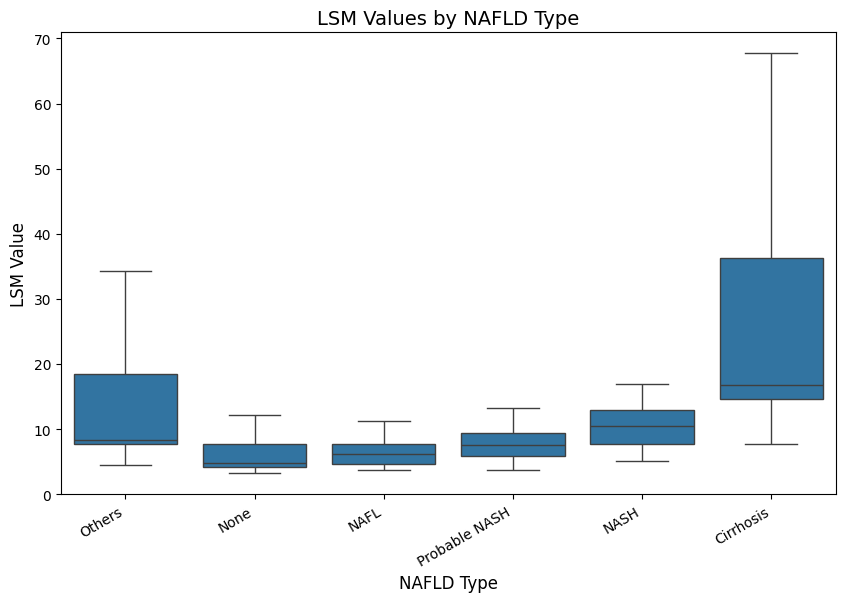

In [86]:
# data LSM 값 관련해서 NAFLD type에 따른 boxplot 그리기
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Copy the original data
df = data.copy()

# Define the NAFLD types in the desired order
nafld_order = ["Others", "None", "NAFL", "Probable NASH", "NASH", "Cirrhosis"]

# Encode "NAFLD Type" as a categorical feature with the specified order

df["NAFLD Type"] = pd.Categorical(
    df["NAFLD Type"], categories=nafld_order, ordered=True
)

# Set the style of the plot


# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="NAFLD Type", y="LSM", data=df, order=nafld_order, showfliers=False)

# Customize labels and title
plt.xlabel("NAFLD Type", fontsize=12)
plt.ylabel("LSM Value", fontsize=12)
plt.title("LSM Values by NAFLD Type", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha="right")

# Show the plot
plt.show()

# Steatosis Score exact 예측 (1) Steatosis 정의 (NAFL부터, Probable NASH 부터, NASH 부터) (2) 환자군 (Fibrosis 환자군 설정과 같은 방법)

In [ ]:
# Adjusted code to ensure subgroup starts from "None" (nafld_order[1]) and includes/excludes "Others" based on a toggle

import pandas as pd
import numpy as np
from itertools import product
from sklearn.metrics import roc_auc_score
from scipy.stats import spearmanr

# Copy the original data
df = data.copy()

# Define features to evaluate
features = [
    "Sex",
    "Age",
    "Weight",
    "Height",
    "Waist to Height",
    "Waist",
    "BMI",
    "Smoking",
    "SBP",
    "DBP",
    "VFI",
    "SFI",
    "TFI",
    "SMI",
    "VFA (Volume)",
    "SFA (Volume)",
    "Spleen (Volume)",
    "VFA (Area)",
    "SFA (Area)",
    "SMA (Area)",
    "VFA (Attenuation)",
    "SFA (Attenuation)",
    "SMA (Attenuation)",
    "Liver/Spleen Volume",
    "Liver/Spleen HU",
    "Liver (HU)",
    "Spleen (HU)",
    "Liver (PDFF)",
    "LSM",
    "CAP",
    "AST",
    "ALT",
    "T.bil",
    "PLT",
    "PT INR",
    "Alb",
    "Glucose",
    "HbA1c",
    "eGFR",
    "T.chol",
    "HDL",
    "LDL",
    "TG",
    "FIB-4",
    "BMI_C",
    "LSM_C",
    "FIB-4_C",
    "당뇨병/당뇨병 전단계 유무",
    "고혈압유무",
    "이상지질혈증 유무",
    "Ischemic Heart Diseae 유무",
    "Cerebrovascualr disease 유무",
    "Nephropathy 유무",
    "Spleen_Vl_Nor_BSA",
    "Spleen_Vl_Nor_WH",
]

# Define categorical and continuous features
categorical_features = [
    "Sex",
    "BMI_C",
    "LSM_C",
    "FIB-4_C",
    "당뇨병/당뇨병 전단계 유무",
    "고혈압유무",
    "이상지질혈증 유무",
    "Ischemic Heart Diseae 유무",
    "Cerebrovascualr disease 유무",
    "Nephropathy 유무",
]

# Continuous features
continuous_features = [col for col in features if col not in categorical_features]

# Encode "NAFLD Type" as a categorical feature
nafld_order = ["Others", "None", "NAFL", "Probable NASH", "NASH", "Cirrhosis"]
df["NAFLD Type"] = pd.Categorical(
    df["NAFLD Type"], categories=nafld_order, ordered=True
)

# Define fibrosis thresholds
steatosis_score_definitions = {">0": 0, ">1": 1, ">2": 2}

# Generate all contiguous subgroup ranges starting from "None" (nafld_order[1])
subgroup_options = []
for i in range(1, len(nafld_order)):  # Start from "None" (index 1)
    for j in range(i + 1, len(nafld_order) + 1):
        subgroup_options.append(nafld_order[i:j])

# Option to include/exclude "Others"
include_others_options = [False, True]  # Toggle whether "Others" is included

# Store results
results = []

# Iterate through all combinations
for fib_label, subgroup, include_others in product(
    steatosis_score_definitions.items(), subgroup_options, include_others_options
):
    fib_label_name, fib_threshold = fib_label

    # Define target label based on fibrosis threshold
    df["Steatosis Score Label"] = (df["Steatosis Score"] > fib_threshold).astype(int)

    # Determine the subgroup with or without "Others"
    if include_others:
        subgroup = ["Others"] + subgroup  # Add "Others" to the subgroup

    # Filter data based on NAFLD Type
    filtered_df = df[df["NAFLD Type"].isin(subgroup)]

    # Skip iteration if no data remains after filtering
    if filtered_df.empty:
        continue

    # AUC score storage for current settings
    auc_scores = []

    for feature in features:
        X = filtered_df[feature]
        y = filtered_df["Steatosis Score Label"]

        # Convert X to a Pandas Series before checking unique values
        X = pd.Series(X)
        y = pd.Series(y)

        # Skip if X has only one unique value (cannot compute AUC)
        if (y.nunique() < 2) or (X.nunique() < 2):
            continue

        # Compute AUC score
        auc = roc_auc_score(y, X)

        # Compute Spearman correlation
        spearman_corr, _ = spearmanr(X, y)

        # Adjust AUC if necessary
        if auc < 0.5:
            auc = 1 - auc

        # Store results
        results.append(
            {
                "Feature": feature,
                "AUC": auc,
                "Fibrosis Definition": fib_label_name,
                "Subgroup Range": ", ".join(subgroup),
                "Spearman Corr": spearman_corr,
            }
        )

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Pivot the table to combine Advanced (>3) and Significant (>2) fibrosis AUC & Spearman correlation into one row
aggregated_results = results_df.pivot_table(
    index=["Feature", "Subgroup Range"],
    columns="Fibrosis Definition",
    values=["AUC", "Spearman Corr"],
).reset_index()

# Flatten MultiIndex columns
aggregated_results.columns = [
    " ".join(col).strip() if isinstance(col, tuple) else col
    for col in aggregated_results.columns
]

# Ensure correct column order explicitly
column_order = [
    "Feature",
    "Subgroup Range",
    "AUC >0",
    "AUC >1",
    "AUC >2",
    "Spearman Corr >0",
    "Spearman Corr >1",
    "Spearman Corr >2",
]
aggregated_results = aggregated_results[column_order]

# Rename columns for clarity
# aggregated_results = aggregated_results.rename(
#     columns={
#         "AUC >1": "AUC (Advanced Fibrosis >1)",
#         "AUC >2": "AUC (Significant Fibrosis >2)",
#         "Spearman Corr >1": "Spearman Corr (Advanced Fibrosis >1)",
#         "Spearman Corr >2": "Spearman Corr (Significant Fibrosis >2)",
#     }
# )

# Add a new column for sorting based on the max AUC value across Advanced & Significant Fibrosis
aggregated_results["Max AUC"] = aggregated_results[
    [
        "AUC >0",
        "AUC >1",
        "AUC >2",
    ]
].max(axis=1)

# Sort by max AUC in descending order
aggregated_results = aggregated_results.sort_values(by="Max AUC", ascending=False)

In [22]:
aggregated_results.to_csv(
    "aggregated_steatosis_score_results.csv", index=False, encoding="utf-8-sig"
)

In [97]:
aggregated_steatosis_results.value_counts("Subgroup Range")

Subgroup Range
NAFL, Probable NASH                                   55
Others, NASH                                          55
Probable NASH, NASH                                   55
Others, Probable NASH, NASH, Cirrhosis                55
Others, Probable NASH, NASH                           55
Others, Probable NASH                                 55
Others, None, NAFL, Probable NASH, NASH, Cirrhosis    55
Others, None, NAFL, Probable NASH, NASH               55
Others, None, NAFL, Probable NASH                     55
Others, None, NAFL                                    55
Others, NASH, Cirrhosis                               55
Others, NAFL, Probable NASH, NASH, Cirrhosis          55
NAFL, Probable NASH, NASH                             55
Others, NAFL, Probable NASH, NASH                     55
Others, NAFL, Probable NASH                           55
Others, NAFL                                          55
Others, Cirrhosis                                     55
None, NAFL, Prob

In [ ]:
aggregated_steatosis_results[
    aggregated_steatosis_results["Subgroup Range"]
    == "Others, None, NAFL, Probable NASH, NASH"
]

,Feature,Subgroup Range,AUC (Steatosis Above None),AUC (Steatosis Above NAFL),AUC (Steatosis Above Probable NASH),Spearman Corr (Steatosis Above None),Spearman Corr (Steatosis Above NAFL),Spearman Corr (Steatosis Above Probable NASH),Max AUC
154,CAP,"Others, None, NAFL, Probable NASH, NASH",0.807747,0.738924,0.670481,0.454663,0.414907,0.266925,0.807747
499,Liver/Spleen HU,"Others, None, NAFL, Probable NASH, NASH",0.794476,0.770595,0.716202,-0.433925,-0.468685,-0.337630,0.794476
982,VFA (Area),"Others, None, NAFL, Probable NASH, NASH",0.789813,0.736674,0.640302,0.427054,0.409931,0.219102,0.789813
85,Alb,"Others, None, NAFL, Probable NASH, NASH",0.785988,0.732736,0.606025,0.422222,0.403882,0.165890,0.785988
407,LSM,"Others, None, NAFL, Probable NASH, NASH",0.533596,0.693925,0.774590,0.049635,0.336766,0.429933,0.774590
1028,VFA (Volume),"Others, None, NAFL, Probable NASH, NASH",0.762076,0.728626,0.644454,0.386181,0.395992,0.225586,0.762076
430,LSM_C,"Others, None, NAFL, Probable NASH, NASH",0.537422,0.692887,0.759953,0.056976,0.345193,0.419446,0.759953
1051,VFI,"Others, None, NAFL, Probable NASH, NASH",0.755619,0.739962,0.662763,0.376667,0.415626,0.254179,0.755619
1074,Waist,"Others, None, NAFL, Probable NASH, NASH",0.748207,0.670517,0.605174,0.365744,0.295345,0.164244,0.748207
453,Liver (HU),"Others, None, NAFL, Probable NASH, NASH",0.693807,0.724299,0.660528,-0.285583,-0.388497,-0.250688,0.724299


# 이 아래부터는 다 정하면 그래프 및 Best Cutoff 결정하기 위한 코드에용

Feature: Liver/Spleen HU, AUC: 0.774, Spearman Corr: 0.468, Flip Decision: Do NOT Flip


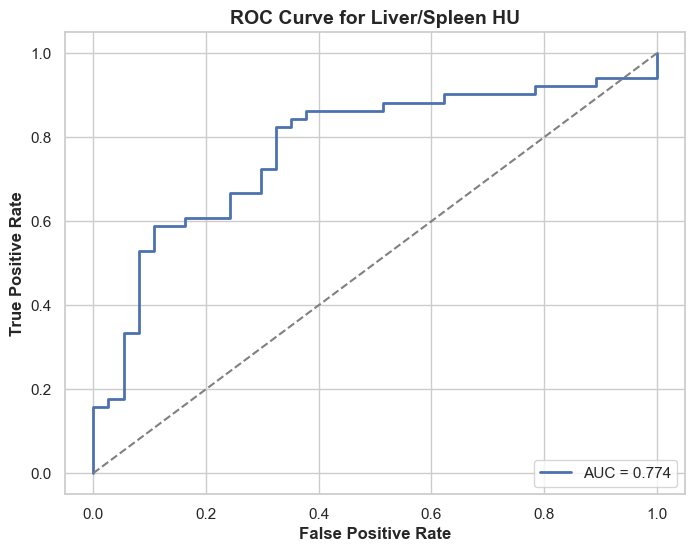

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Define feature and target
# Copy your data
df = data_with_NASH.copy()

# Define the target variable
df["Fibrosis Label"] = (df["Fibrosis Stage"] == "High").astype(int)
target = "Fibrosis Label"

feature = "Liver/Spleen HU"
X = df[feature]
y = df["Fibrosis Label"]  # Assuming "Fibrosis Label" is already defined

# Calculate AUC
auc = roc_auc_score(y, X)

# Calculate Spearman correlation
spearman_corr, _ = spearmanr(X, y)

# Flip AUC if less than 0.5
if auc < 0.5:
    auc = 1 - auc
    X = X.max() - X  # Flip values

# Determine if flipping is recommended
flip_decision = "Flip" if spearman_corr < 0 else "Do NOT Flip"
print(
    f"Feature: {feature}, AUC: {auc:.3f}, Spearman Corr: {spearman_corr:.3f}, Flip Decision: {flip_decision}"
)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y, X)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random guess line

# Formatting
plt.title(f"ROC Curve for {feature}", fontsize=14, fontweight="bold")
plt.xlabel("False Positive Rate", fontsize=12, fontweight="bold")
plt.ylabel("True Positive Rate", fontsize=12, fontweight="bold")
plt.legend(loc="lower right")
plt.grid(True)

# Save the plot
plt.savefig("ROC_Liver Spleen HU_NASH.png", dpi=1000, bbox_inches="tight")
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve

# Define the feature and target
target = "Fibrosis Label"
feature = "Liver/Spleen HU"

X = df[feature]
y = df[target]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y, X)

# Compute Youden's J statistic (sensitivity + specificity - 1)
youden_j = tpr - fpr

# Find the index of the maximum Youden's J statistic
best_index = np.argmax(youden_j)
best_cutoff = thresholds[best_index]

# Print the best cutoff value
print(f"Best Cutoff for {feature}: {best_cutoff:.2f}")
print(df.shape)

Best Cutoff for Liver/Spleen HU: 0.76
(88, 71)


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve

df_steatosis = pd.read_csv("./250306_208_aggregated_steatosis_results.csv")
df_s_score = pd.read_csv("./250306_208_aggregated_steatosis_score_results.csv")
df_fibrosis = pd.read_csv("./250306_208_aggregated_results.csv")

In [21]:
df_steatosis.columns

Index(['Feature', 'Subgroup Range', 'AUC (Steatosis Above None)',
       'AUC (Steatosis Above NAFL)', 'AUC (Steatosis Above Probable NASH)',
       'Spearman Corr (Steatosis Above None)',
       'Spearman Corr (Steatosis Above NAFL)',
       'Spearman Corr (Steatosis Above Probable NASH)', 'Max AUC'],
      dtype='object')

In [ ]:
# df_s_score의 Subgroup Range에 None이 있고 NASH가 있고 Others가 없고 Cirrhosis도 없는 경우우
df_None_to_NASH = df_s_score[
    (df_s_score["Subgroup Range"].str.contains("None"))
    & (df_s_score["Subgroup Range"].str.contains("NASH"))
    & (~df_s_score["Subgroup Range"].str.contains("Others"))
    & (~df_s_score["Subgroup Range"].str.contains("Cirrhosis"))
]

In [3]:
# df_s_score의 Subgroup Range에 None이 있고 NASH가 있고 Others가 없고 Cirrhosis도 없는 경우우
df_None_to_NASH = df_s_score[
    (df_s_score["Subgroup Range"].str.contains("None, NAFL, Probable NASH, NASH"))
    & (~df_s_score["Subgroup Range"].str.contains("Others"))
    & (~df_s_score["Subgroup Range"].str.contains("Cirrhosis"))
]

In [45]:
df_None_to_Cirrhosis = df_s_score[
    (df_s_score["Subgroup Range"].str.contains("None, NAFL, Probable NASH, NASH, Cirrhosis"))
    & (~df_s_score["Subgroup Range"].str.contains("Others"))
]

In [4]:
df_None_to_NASH['Subgroup Range'].unique()

array(['None, NAFL, Probable NASH, NASH'], dtype=object)

In [27]:
# pandas 출력 제한 없애기
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)

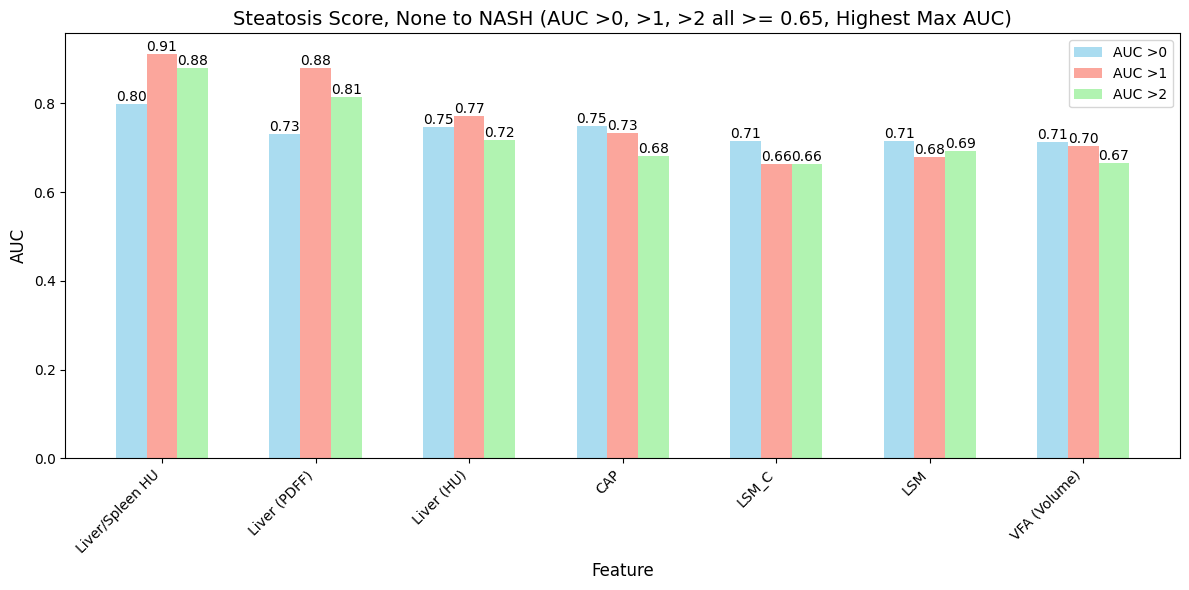

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Filter rows where AUC >0, AUC >1, and AUC >2 are all >= 0.7
thres = 0.65
filtered_df = df_None_to_NASH[
    (df_None_to_NASH["AUC >0"] >= thres) & 
    (df_None_to_NASH["AUC >1"] >= thres) & 
    (df_None_to_NASH["AUC >2"] >= thres)
]

# Select the top 5 features with the highest Max AUC from the filtered dataframe
top_features = filtered_df.nlargest(7, "Max AUC")

# Define the feature names and AUC values
features = top_features["Feature"]
auc_0 = top_features["AUC >0"]
auc_1 = top_features["AUC >1"]
auc_2 = top_features["AUC >2"]

# Set bar width and x locations
bar_width = 0.2
x = np.arange(len(features))

# Create a bar plot with separate bars
plt.figure(figsize=(12, 6))
bars_0 = plt.bar(x - bar_width, auc_0, width=bar_width, color="skyblue", label="AUC >0", alpha=0.7)
bars_1 = plt.bar(x, auc_1, width=bar_width, color="salmon", label="AUC >1", alpha=0.7)
bars_2 = plt.bar(x + bar_width, auc_2, width=bar_width, color="lightgreen", label="AUC >2", alpha=0.7)

# Add text labels above bars
for bars in [bars_0, bars_1, bars_2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}", ha="center", va="bottom", fontsize=10)

# Add labels and title
plt.xlabel("Feature", fontsize=12)
plt.ylabel("AUC", fontsize=12)
plt.title(f"Steatosis Score, None to NASH (AUC >0, >1, >2 all >= {thres}, Highest Max AUC)", fontsize=14)
plt.xticks(x, features, rotation=45, ha="right")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


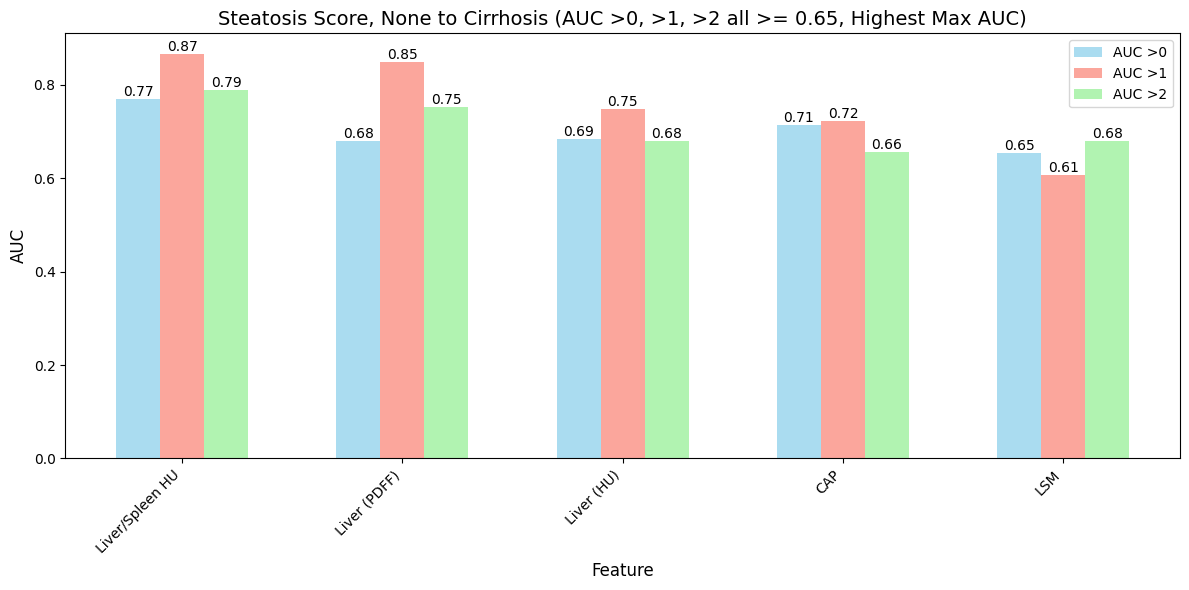

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Filter rows where AUC >0, AUC >1, and AUC >2 are all >= 0.7
thres = 0.65
filtered_df = df_None_to_Cirrhosis[
    (df_None_to_Cirrhosis["AUC >0"] >= thres) & 
    (df_None_to_Cirrhosis["AUC >1"] >= thres) & 
    (df_None_to_Cirrhosis["AUC >2"] >= thres)
]

# Select the top 5 features with the highest Max AUC from the filtered dataframe
top_features = filtered_df.nlargest(7, "Max AUC")

df_LSM_CAP = df_None_to_Cirrhosis[df_None_to_Cirrhosis["Feature"].isin(["LSM", ""])]

# concat LSM and CAP
top_features = pd.concat([top_features, df_LSM_CAP])

# Define the feature names and AUC values
features = top_features["Feature"]
auc_0 = top_features["AUC >0"]
auc_1 = top_features["AUC >1"]
auc_2 = top_features["AUC >2"]

# Set bar width and x locations
bar_width = 0.2
x = np.arange(len(features))

# Create a bar plot with separate bars
plt.figure(figsize=(12, 6))
bars_0 = plt.bar(x - bar_width, auc_0, width=bar_width, color="skyblue", label="AUC >0", alpha=0.7)
bars_1 = plt.bar(x, auc_1, width=bar_width, color="salmon", label="AUC >1", alpha=0.7)
bars_2 = plt.bar(x + bar_width, auc_2, width=bar_width, color="lightgreen", label="AUC >2", alpha=0.7)

# Add text labels above bars
for bars in [bars_0, bars_1, bars_2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}", ha="center", va="bottom", fontsize=10)

# Add labels and title
plt.xlabel("Feature", fontsize=12)
plt.ylabel("AUC", fontsize=12)
plt.title(f"Steatosis Score, None to Cirrhosis (AUC >0, >1, >2 all >= {thres}, Highest Max AUC)", fontsize=14)
plt.xticks(x, features, rotation=45, ha="right")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [75]:
df_None_to_NASH = df_steatosis[
    (df_steatosis["Subgroup Range"].str.contains("None, NAFL, Probable NASH, NASH, Cirrhosis"))
    & (~df_steatosis["Subgroup Range"].str.contains("Others"))
    # & (~df_steatosis["Subgroup Range"].str.contains("Cirrhosis"))
]

In [57]:
df_None_to_NASH.columns

Index(['Feature', 'Subgroup Range', 'AUC (Steatosis Above None)',
       'AUC (Steatosis Above NAFL)', 'AUC (Steatosis Above Probable NASH)',
       'Spearman Corr (Steatosis Above None)',
       'Spearman Corr (Steatosis Above NAFL)',
       'Spearman Corr (Steatosis Above Probable NASH)', 'Max AUC'],
      dtype='object')

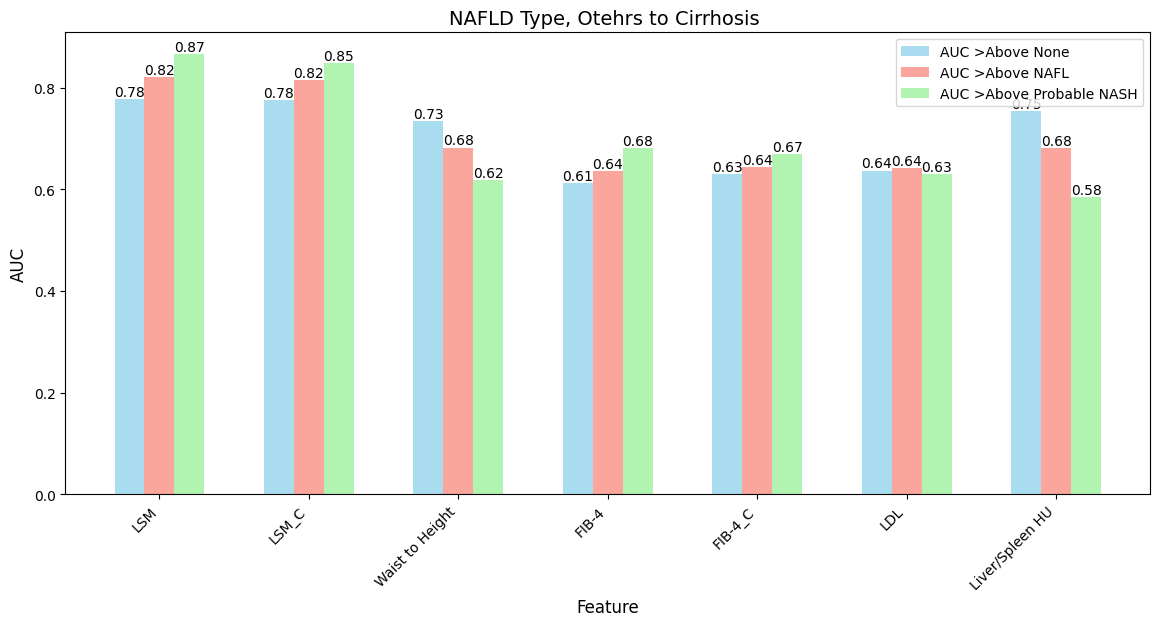

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Filter rows where AUC >0, AUC >1, and AUC >2 are all >= 0.7
thres = 0.60
filtered_df = df_None_to_NASH[
    (df_None_to_NASH['AUC (Steatosis Above None)'] >= thres) & 
    (df_None_to_NASH['AUC (Steatosis Above NAFL)'] >= thres) &
    (df_None_to_NASH['AUC (Steatosis Above Probable NASH)'] >= thres)
]

# Select the top 5 features with the highest Max AUC from the filtered dataframe
top_features = filtered_df.nlargest(7, "Max AUC")


df_LSM_CAP = df_None_to_NASH[df_None_to_NASH["Feature"].isin(["Liver/Spleen HU", ""])]

# concat LSM and CAP
top_features = pd.concat([top_features, df_LSM_CAP])

# Define the feature names and AUC values
features = top_features["Feature"]
auc_0 = top_features["AUC (Steatosis Above None)"]
auc_1 = top_features["AUC (Steatosis Above NAFL)"]
auc_2 = top_features["AUC (Steatosis Above Probable NASH)"]


# Set bar width and x locations
bar_width = 0.2
x = np.arange(len(features))

# Create a bar plot with separate bars
plt.figure(figsize=(14, 6))
bars_0 = plt.bar(x - bar_width, auc_0, width=bar_width, color="skyblue", label="AUC >Above None", alpha=0.7)
bars_1 = plt.bar(x, auc_1, width=bar_width, color="salmon", label="AUC >Above NAFL", alpha=0.7)
bars_2 = plt.bar(x + bar_width, auc_2, width=bar_width, color="lightgreen", label="AUC >Above Probable NASH", alpha=0.7)

# Add text labels above bars
for bars in [bars_0, bars_1, bars_2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}", ha="center", va="bottom", fontsize=10)

# Add labels and title
plt.xlabel("Feature", fontsize=12)
plt.ylabel("AUC", fontsize=12)
plt.title(f"NAFLD Type, Otehrs to Cirrhosis ", fontsize=14)
plt.xticks(x, features, rotation=45, ha="right")
plt.legend()

# Show the plot
# plt.tight_layout()
plt.show()

In [10]:
df_fibrosis = pd.read_excel("250306_208_aggregated_results.xlsx")
df_fibrosis.columns

Index(['Feature', 'Subgroup Range', 'AUC \n(Significant \nFibrosis >1)',
       'AUC \n(Advanced \nFibrosis >2)',
       'Spearman Corr (Advanced Fibrosis >1)',
       'Spearman Corr (Significant Fibrosis >2)', 'Max AUC'],
      dtype='object')

In [94]:
df_fibrosis['Feature'].unique()

array(['Liver/Spleen Volume', 'Liver/Spleen HU', 'Spleen_Vl_Nor_BSA',
       'Spleen (Volume)', 'Spleen_Vl_Nor_WH', 'DBP', 'PLT', 'SBP',
       'Waist to Height', 'LSM_C', 'LSM', 'VFA (Area)', 'Waist', 'Height',
       'VFA (Attenuation)', 'Liver (HU)', 'Spleen (HU)', 'Glucose',
       'SFA (Area)', 'TFI', 'VFI', 'PT INR', 'FIB-4', 'Age', 'Alb',
       'eGFR', 'Sex', 'TG', 'SMA (Attenuation)', 'CAP', 'Liver (PDFF)',
       'SFA (Volume)', 'FIB-4_C', 'ALT', 'VFA (Volume)', 'T.bil', 'BMI',
       'SFI', 'AST', 'BMI_C', 'Weight', 'SMA (Area)', '고혈압유무',
       '당뇨병/당뇨병 전단계 유무', 'T.chol', 'SMI', 'HDL', 'SFA (Attenuation)',
       'LDL', 'Nephropathy 유무', 'HbA1c', '이상지질혈증 유무', 'Smoking',
       'Cerebrovascualr disease 유무', 'Ischemic Heart Diseae 유무'],
      dtype=object)

In [24]:
df_None_to_NASH = df_fibrosis[
    (df_fibrosis["Subgroup Range"].str.contains("None, NAFL, Probable NASH, NASH"))
    & (~df_fibrosis["Subgroup Range"].str.contains("Others"))
    & (~df_fibrosis["Subgroup Range"].str.contains("Cirrhosis"))
]

In [98]:
df_None_to_NASH['Feature'].unique()

array(['LSM', 'LSM_C', 'FIB-4', 'Height', 'FIB-4_C', 'SMA (Area)', 'Age',
       'SMA (Attenuation)', 'Weight', 'PLT', 'ALT', '이상지질혈증 유무', 'SMI',
       'AST', 'Waist to Height', 'eGFR', '당뇨병/당뇨병 전단계 유무', 'Sex', '고혈압유무',
       'Spleen (HU)', 'DBP', 'HbA1c', 'SFA (Volume)', 'T.bil', 'Waist',
       'PT INR', 'Alb', 'Cerebrovascualr disease 유무', 'Liver (HU)',
       'Glucose', 'Nephropathy 유무', 'HDL', 'T.chol', 'VFA (Attenuation)',
       'VFI', 'TFI', 'LDL', 'Spleen_Vl_Nor_WH', 'VFA (Volume)',
       'Ischemic Heart Diseae 유무', 'SBP', 'BMI_C', 'TG', 'CAP',
       'VFA (Area)', 'Spleen_Vl_Nor_BSA', 'SFI', 'Liver/Spleen HU',
       'Liver (PDFF)', 'BMI', 'SFA (Area)', 'SFA (Attenuation)',
       'Spleen (Volume)', 'Smoking', 'Liver/Spleen Volume'], dtype=object)

In [103]:
df_None_to_NASH.columns

Index(['Feature', 'Subgroup Range', 'AUC \n(Significant \nFibrosis >1)',
       'AUC \n(Advanced \nFibrosis >2)',
       'Spearman Corr (Advanced Fibrosis >1)',
       'Spearman Corr (Significant Fibrosis >2)', 'Max AUC'],
      dtype='object')

In [65]:
df_fibrosis = pd.read_csv("250312_208_aggregated_results.csv")

In [55]:
df_fibrosis['Feature'].unique()

array(['Spleen (Volume)', 'Spleen_Vl_Nor_BSA', 'Liver/Spleen HU',
       'Spleen_Vl_Nor_WH', 'Liver/Spleen Volume', 'DBP', 'PLT', 'SBP',
       'Waist to Height', 'LSM_C', 'LSM_plus_Liver/Spleen HU', 'LSM',
       'LSM_minus_Liver/Spleen HU', 'VFA (Area)', 'Height', 'Waist',
       'VFA (Attenuation)', 'Spleen (HU)', 'Liver (HU)', 'SFA (Area)',
       'Glucose', 'VFI', 'TFI', 'PT INR', 'FIB-4', 'Age', 'Alb',
       'FIB-4_minus_Liver/Spleen HU', 'eGFR', 'Sex', 'SMA (Attenuation)',
       'TG', 'CAP', 'Liver (PDFF)', 'SFA (Volume)', 'FIB-4_C', 'ALT',
       'VFA (Volume)', 'T.bil', 'BMI', 'SFI', 'AST', 'BMI_C', 'Weight',
       'SMA (Area)', '고혈압유무', '당뇨병/당뇨병 전단계 유무', 'T.chol', 'SMI', 'HDL',
       'SFA (Attenuation)', 'LDL', 'Nephropathy 유무', 'HbA1c', '이상지질혈증 유무',
       'Smoking', 'Cerebrovascualr disease 유무',
       'Ischemic Heart Diseae 유무'], dtype=object)

In [43]:
df_NASH_to_Cirrhosis = df_fibrosis[
    (df_fibrosis["Subgroup Range"] == "NASH, Cirrhosis")
    & (~df_fibrosis["Subgroup Range"].str.contains("Others"))
]

In [44]:
df_NASH_to_Cirrhosis["Subgroup Range"].unique()

array(['NASH, Cirrhosis'], dtype=object)

In [ ]:
df_NASH_to_Cirrhosis

In [26]:
df_None_to_NASH.columns

Index(['Feature', 'Subgroup Range', 'AUC (Advanced Fibrosis >1)',
       'AUC (Significant Fibrosis >2)', 'Spearman Corr (Advanced Fibrosis >1)',
       'Spearman Corr (Significant Fibrosis >2)', 'Max AUC'],
      dtype='object')

In [66]:
df_None_to_NASH = df_fibrosis[
    (df_fibrosis["Subgroup Range"].str.contains("None, NAFL, Probable NASH, NASH"))
    & (~df_fibrosis["Subgroup Range"].str.contains("Others"))
    & (~df_fibrosis["Subgroup Range"].str.contains("Cirrhosis"))
]

In [67]:
df_None_to_NASH = df_None_to_NASH.rename(columns={
    "AUC (Advanced Fibrosis >1)": "AUC \n(Significant \nFibrosis >1)",
    "AUC (Significant Fibrosis >2)": "AUC \n(Advanced \nFibrosis >2)"
})


In [58]:
df_NASH_to_Cirrhosis = df_NASH_to_Cirrhosis.rename(columns={
    "AUC (Advanced Fibrosis >1)": "AUC \n(Significant \nFibrosis >1)",
    "AUC (Significant Fibrosis >2)": "AUC \n(Advanced \nFibrosis >2)"
})


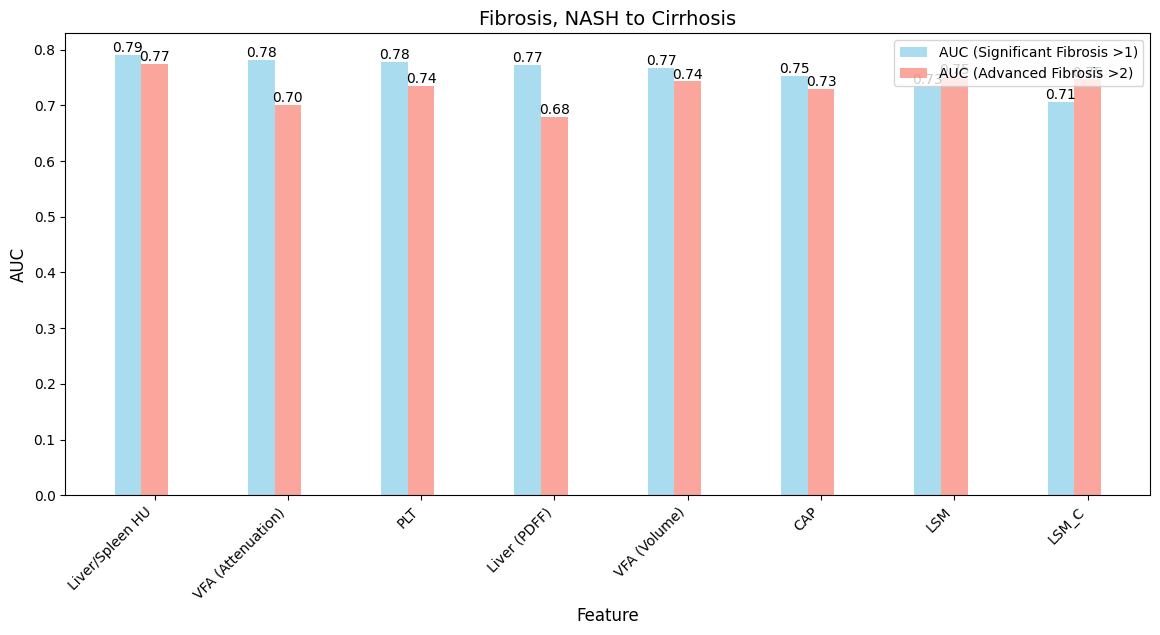

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Filter rows where AUC >0, AUC >1, and AUC >2 are all >= 0.7
thres = 0.65
filtered_df = df_NASH_to_Cirrhosis[
    (df_NASH_to_Cirrhosis['AUC \n(Significant \nFibrosis >1)'] >= thres) & 
    (df_NASH_to_Cirrhosis['AUC \n(Advanced \nFibrosis >2)'] >= thres)
]

# Select the top 5 features with the highest Max AUC from the filtered dataframe
top_features = filtered_df.nlargest(5, "Max AUC")


df_LSM_CAP = df_NASH_to_Cirrhosis[df_NASH_to_Cirrhosis["Feature"].isin(["LSM", "CAP", "LSM_C"])]

# concat LSM and CAP
top_features = pd.concat([top_features, df_LSM_CAP])

# Define the feature names and AUC values
features = top_features["Feature"]
auc_0 = top_features["AUC \n(Significant \nFibrosis >1)"]
auc_1 = top_features["AUC \n(Advanced \nFibrosis >2)"]


# Set bar width and x locations
bar_width = 0.2
x = np.arange(len(features))

# Create a bar plot with separate bars
plt.figure(figsize=(14, 6))
bars_0 = plt.bar(x - bar_width, auc_0, width=bar_width, color="skyblue", label="AUC (Significant Fibrosis >1)", alpha=0.7)
bars_1 = plt.bar(x, auc_1, width=bar_width, color="salmon", label="AUC (Advanced Fibrosis >2)", alpha=0.7)
# bars_2 = plt.bar(x + bar_width, auc_2, width=bar_width, color="lightgreen", label="AUC >Above Probable NASH", alpha=0.7)

# Add text labels above bars
for bars in [bars_0, bars_1]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}", ha="center", va="bottom", fontsize=10)

# Add labels and title
plt.xlabel("Feature", fontsize=12)
plt.ylabel("AUC", fontsize=12)
plt.title(f"Fibrosis, NASH to Cirrhosis", fontsize=14)
plt.xticks(x, features, rotation=45, ha="right")
plt.legend()

# Show the plot
# plt.tight_layout()
plt.show()

In [36]:
df_None_to_NASH['Feature'].unique()

array(['LSM', 'LSM_plus_Liver/Spleen HU', 'LSM_C', 'FIB-4', 'Height',
       'FIB-4_C', 'SMA (Area)', 'Age', 'SMA (Attenuation)', 'Weight',
       'PLT', 'ALT', '이상지질혈증 유무', 'SMI', 'AST', 'Waist to Height', 'eGFR',
       '당뇨병/당뇨병 전단계 유무', 'Sex', '고혈압유무', 'Spleen (HU)', 'DBP', 'HbA1c',
       'SFA (Volume)', 'T.bil', 'Waist', 'PT INR', 'Alb',
       'Cerebrovascualr disease 유무', 'Liver (HU)', 'Glucose',
       'Nephropathy 유무', 'HDL', 'T.chol', 'VFA (Attenuation)', 'VFI',
       'TFI', 'LDL', 'Spleen_Vl_Nor_WH', 'VFA (Volume)',
       'Ischemic Heart Diseae 유무', 'SBP', 'BMI_C', 'TG', 'CAP',
       'VFA (Area)', 'Spleen_Vl_Nor_BSA', 'SFI', 'Liver/Spleen HU',
       'Liver (PDFF)', 'BMI', 'SFA (Area)', 'SFA (Attenuation)',
       'Spleen (Volume)', 'Smoking', 'Liver/Spleen Volume'], dtype=object)

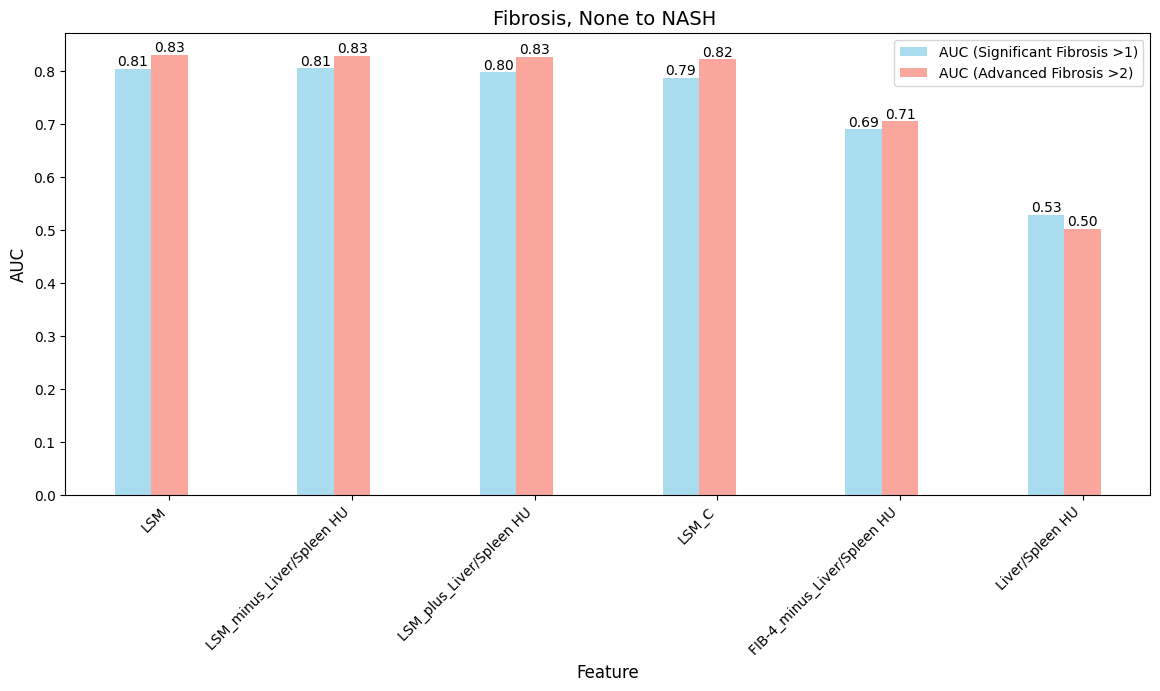

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Filter rows where AUC >0, AUC >1, and AUC >2 are all >= 0.7
thres = 0.65
filtered_df = df_None_to_NASH[
    (df_None_to_NASH['AUC \n(Significant \nFibrosis >1)'] >= thres) & 
    (df_None_to_NASH['AUC \n(Advanced \nFibrosis >2)'] >= thres)
]

# Select the top 5 features with the highest Max AUC from the filtered dataframe
top_features = filtered_df.nlargest(5, "Max AUC")


df_LSM_CAP = df_None_to_NASH[df_None_to_NASH["Feature"].isin(["Liver/Spleen HU"])]

# concat LSM and CAP
top_features = pd.concat([top_features, df_LSM_CAP])

# Define the feature names and AUC values
features = top_features["Feature"]
auc_0 = top_features["AUC \n(Significant \nFibrosis >1)"]
auc_1 = top_features["AUC \n(Advanced \nFibrosis >2)"]


# Set bar width and x locations
bar_width = 0.2
x = np.arange(len(features))

# Create a bar plot with separate bars
plt.figure(figsize=(14, 6))
bars_0 = plt.bar(x - bar_width, auc_0, width=bar_width, color="skyblue", label="AUC (Significant Fibrosis >1)", alpha=0.7)
bars_1 = plt.bar(x, auc_1, width=bar_width, color="salmon", label="AUC (Advanced Fibrosis >2)", alpha=0.7)
# bars_2 = plt.bar(x + bar_width, auc_2, width=bar_width, color="lightgreen", label="AUC >Above Probable NASH", alpha=0.7)

# Add text labels above bars
for bars in [bars_0, bars_1]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}", ha="center", va="bottom", fontsize=10)

# Add labels and title
plt.xlabel("Feature", fontsize=12)
plt.ylabel("AUC", fontsize=12)
plt.title(f"Fibrosis, None to NASH ", fontsize=14)
plt.xticks(x, features, rotation=45, ha="right")
plt.legend()

# Show the plot
# plt.tight_layout()
plt.show()